In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
us_actor = pd.read_csv('US Actor.csv',encoding= 'unicode_escape')
us_recipient = pd.read_csv('US Recipient.csv',encoding= 'unicode_escape')

# US Actor

In [4]:
df_1 = pd.DataFrame(us_actor)
df_1['Date'] = pd.to_datetime(us_actor['Date'], format='%Y%m%d')
df_1['Date'].dtype
df_1['YearMonth'] = df_1['Date'].dt.to_period('M')
#df_1

In [5]:
df_1.drop(df_1[(df_1['TargetCountryName']=='USA') & (df_1['ReceivingCountryName']=='USA')].index,inplace=True)
df_1.drop(df_1[(df_1['TargetCountryName']== '0') | (df_1['ReceivingCountryName']== '0')].index,inplace=True)

In [6]:
df_1 = df_1.reset_index()
#df_1

### Daily Average Sentiments of Each Country when US is Actor 

In [7]:
country_daily_actor = df_1.groupby(['Date', 'TargetCountryName','ReceivingCountryName']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    TotalActionCount=('Action', 'count'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')
).reset_index()
#country_daily_actor

In [8]:
country_daily_pivot_tar = country_daily_actor.pivot_table(index='Date', columns='ReceivingCountryName', values='AvgSentiment',fill_value=0)
country_daily_pivot_tar.pop('USA')
country_daily_pivot_tar
# US is Target Country

ReceivingCountryName       ARE       AUS       AUT       BEL       BRA  \
Date                                                                     
2016-01-01           -2.018796 -0.534351  0.000000  0.000000  0.000000   
2016-01-02            0.000000  0.000000  0.000000  0.000000  0.000000   
2016-01-03            0.000000 -1.518027  0.000000  0.000000  0.000000   
2016-01-04            0.000000 -3.703704 -3.221149  0.000000  0.000000   
2016-01-05            0.000000  1.008065 -1.972595  0.000000 -6.140351   
...                        ...       ...       ...       ...       ...   
2024-05-24            0.000000  0.000000  0.000000  0.000000  0.000000   
2024-05-25            0.000000  1.477833  0.000000 -2.726473  3.797468   
2024-05-26            0.000000 -6.563707  0.000000  0.000000  0.000000   
2024-05-27            0.000000  0.000000  0.000000  0.000000  0.000000   
2024-05-28            0.000000  0.000000  0.000000  0.000000  0.000000   

ReceivingCountryName       CAN       CHE  CHL       CHN       COL  ...  \
Date                                                               ...   
2016-01-01            0.000000  0.000000  0.0 -3.185989  2.102804  ...   
2016-01-02            0.000000  0.000000  0.0  4.700855  0.000000  ...   
2016-01-03            2.881844 -2.196970  0.0 -2.636204  0.000000  ...   
2016-01-04           -2.883339  0.000000  0.0  2.994652  0.305810  ...   
2016-01-05            1.958411  0.000000  0.0 -0.491326  0.704356  ...   
...                        ...       ...  ...       ...       ...  ...   
2024-05-24            1.442359 -0.793651  0.0 -0.886283  0.000000  ...   
2024-05-25            1.129944  0.000000  0.0 -0.644398  0.000000  ...   
2024-05-26            1.039501  0.000000  0.0 -1.568169  0.000000  ...   
2024-05-27           -0.000230  0.000000  0.0 -2.741943  0.000000  ...   
2024-05-28            0.000000  0.000000  0.0  0.000000  0.000000  ...   

ReceivingCountryName       POL  PRT  QAT        SAU       SGP       SWE  \
Date                                                                      
2016-01-01            0.000000  0.0  0.0   0.000000  0.000000  0.000000   
2016-01-02            0.000000  0.0  0.0 -10.726644  0.000000  0.000000   
2016-01-03            0.000000  0.0  0.0  -7.177529  0.000000  0.000000   
2016-01-04            0.000000  0.0  0.0  -7.795274  1.518219  0.000000   
2016-01-05            0.000000  0.0  0.0  -2.715656  0.000000  0.000000   
...                        ...  ...  ...        ...       ...       ...   
2024-05-24           -1.785714  0.0  0.0   0.000000  0.000000  0.000000   
2024-05-25            0.000000  0.0  0.0   0.000000  1.138520  0.000000   
2024-05-26            0.000000  0.0  0.0  -5.253236  0.000000 -5.343511   
2024-05-27            0.000000  0.0  0.0  -3.932507  2.888889  0.000000   
2024-05-28            0.000000  0.0  0.0   0.000000  0.000000  0.000000   

ReceivingCountryName       THA       TUR       TWN       ZAF  
Date                                                          
2016-01-01            0.000000 -4.101141  0.000000  0.000000  
2016-01-02            0.000000  0.000000  0.000000  0.000000  
2016-01-03            0.000000 -4.005525  0.000000  0.670653  
2016-01-04           -4.311377  0.000000  0.000000 -2.000000  
2016-01-05            0.000000 -0.739394  0.000000 -1.765555  
...                        ...       ...       ...       ...  
2024-05-24            0.000000  0.000000  0.000000  0.000000  
2024-05-25            0.000000  0.000000  0.000000  0.000000  
2024-05-26            0.000000  0.000000 -0.301205  0.000000  
2024-05-27            0.000000  0.000000 -0.822346  3.968254  
2024-05-28            0.000000  0.000000  0.000000  0.000000  

[3070 rows x 46 columns]

In [ ]:
country_daily_pivot_tar[]

In [51]:
# country_daily_actor.to_csv('country_daily_US_actor.csv')

### Daily Average Sentiments of Each Action when US is Actor 


In [9]:
action_daily_actor = df_1.groupby(['Date', 'Action Name']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')
).reset_index()
action_daily_actor

Date                                       Action Name  \
0     2016-01-01                              Accuse of aggression   
1     2016-01-01                       Accuse, not specified below   
2     2016-01-01                                         Apologize   
3     2016-01-01       Arrest, detain, or charge with legal action   
4     2016-01-01                                       Assassinate   
...          ...                                               ...   
97487 2024-05-28                                      Host a visit   
97488 2024-05-28                  Investigate, not specified below   
97489 2024-05-28                                      Make a visit   
97490 2024-05-28                  Provide aid, not specified below   
97491 2024-05-28  Use unconventional violence, not specified below   

       TotalArticleCount  AvgSentiment  AvgGoldsteinScale  
0                      2    -11.328125               -2.0  
1                      5     -7.704918               -2.0  
2                      3     -3.306878                7.0  
3                     10     -6.140351               -5.0  
4                      1      0.081235              -10.0  
...                  ...           ...                ...  
97487                  2      1.960784                2.8  
97488                  6      1.277955               -2.0  
97489                  2      1.960784                1.9  
97490                  7     -2.376587                7.0  
97491                  2     -0.196078               -9.0  

[97492 rows x 5 columns]

In [10]:
action_daily_pivot = action_daily_actor.pivot_table(index='Date', columns='Action Name', values='AvgSentiment',fill_value=0)
action_daily_pivot

Action Name  Abduct, hijack, or take hostage  \
Date                                           
2016-01-01                               0.0   
2016-01-02                               0.0   
2016-01-03                               0.0   
2016-01-04                               0.0   
2016-01-05                               0.0   
...                                      ...   
2024-05-24                               0.0   
2024-05-25                               0.0   
2024-05-26                               0.0   
2024-05-27                               0.0   
2024-05-28                               0.0   

Action Name  Accede to demands for change in leadership  \
Date                                                      
2016-01-01                                     0.000000   
2016-01-02                                     0.000000   
2016-01-03                                     0.000000   
2016-01-04                                     0.344828   
2016-01-05                                     0.000000   
...                                                 ...   
2024-05-24                                     0.000000   
2024-05-25                                     0.000000   
2024-05-26                                     0.000000   
2024-05-27                                     0.000000   
2024-05-28                                     0.000000   

Action Name  Accede to demands for rights  \
Date                                        
2016-01-01                            0.0   
2016-01-02                            0.0   
2016-01-03                            0.0   
2016-01-04                            0.0   
2016-01-05                            0.0   
...                                   ...   
2024-05-24                            0.0   
2024-05-25                            0.0   
2024-05-26                            0.0   
2024-05-27                            0.0   
2024-05-28                            0.0   

Action Name  Accede to requests or demands for political reform, not specified below  \
Date                                                                                   
2016-01-01                                                 0.0                         
2016-01-02                                                 0.0                         
2016-01-03                                                 0.0                         
2016-01-04                                                 0.0                         
2016-01-05                                                 0.0                         
...                                                        ...                         
2024-05-24                                                 0.0                         
2024-05-25                                                 0.0                         
2024-05-26                                                 0.0                         
2024-05-27                                                 0.0                         
2024-05-28                                                 0.0                         

Action Name  Accuse of aggression  Accuse of crime, corruption  \
Date                                                             
2016-01-01             -11.328125                          0.0   
2016-01-02               0.000000                          0.0   
2016-01-03               0.000000                          0.0   
2016-01-04               0.000000                          0.0   
2016-01-05               0.000000                          0.0   
...                           ...                          ...   
2024-05-24               0.000000                          0.0   
2024-05-25               0.000000                          0.0   
2024-05-26               0.000000                          0.0   
2024-05-27               0.000000                          0.0   
2024-05-28               0.000000                          0.0   

Action Name  Accu

In [11]:
# action_daily_pivot.to_csv('action_daily_US_actor.csv')

In [12]:
top_receiving_countries_daily = country_daily_actor.groupby('ReceivingCountryName')['TotalArticleCount'].sum().nlargest(15).index
print('Daily Top 10 Receiving Countries:',top_receiving_countries_daily.tolist())

top_target_countries_daily = country_daily_actor.groupby('TargetCountryName')['TotalArticleCount'].sum().nlargest(15).index
print('Daily Top 10 Target Countries:',top_target_countries_daily.tolist())

# USA shall not be considered

Daily Top 10 Receiving Countries: ['USA', 'CHN', 'ISR', 'GBR', 'DEU', 'MEX', 'CAN', 'JPN', 'FRA', 'IND', 'TUR', 'SAU', 'AUS', 'KOR', 'EGY']
Daily Top 10 Target Countries: ['USA', 'CHN', 'GBR', 'ISR', 'MEX', 'DEU', 'CAN', 'FRA', 'IND', 'JPN', 'TUR', 'SAU', 'AUS', 'KOR', 'PHL']


In [13]:
top_actions_daily = action_daily_actor.groupby('Action Name')['TotalArticleCount'].sum().nlargest(15).index
print('Daily Top 10 Actions:',top_actions_daily.tolist())

Daily Top 10 Actions: ['Consult, not specified below', 'Engage in negotiation', 'Express intent to meet or negotiate', 'Make a visit', 'Make statement, not specified below', 'Praise or endorse', 'Host a visit', 'Make an appeal or request, not specified below', 'Criticize or denounce', 'Express intent to cooperate, not specified below', 'Discuss by telephone', 'Make optimistic comment', 'Accuse, not specified below', 'Reject, not specified below', 'Sign formal agreement']


In [2]:
#country_daily_pivot_tar[top_receiving_countries_daily]

### Daily average sentiment when US is an Actor

In [14]:
country_daily_actor_senti = df_1.groupby(['Date']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    TotalActionCount=('Action', 'count'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')
).reset_index()
country_daily_actor_senti

Date  TotalArticleCount  TotalActionCount  AvgSentiment  \
0    2016-01-01                377                62     -2.142575   
1    2016-01-02                279                46     -1.645651   
2    2016-01-03                483                65     -2.136236   
3    2016-01-04                690                94     -2.283673   
4    2016-01-05                891               112     -1.704155   
...         ...                ...               ...           ...   
3065 2024-05-24                528                83     -0.897738   
3066 2024-05-25                336                54     -0.878531   
3067 2024-05-26                444                63     -2.000429   
3068 2024-05-27                440                69     -2.559789   
3069 2024-05-28                 59                11      0.447792   

      AvgGoldsteinScale  
0              0.588710  
1              1.356522  
2              1.104615  
3              2.289362  
4              0.500893  
...                 ...  
3065           1.697590  
3066           2.359259  
3067           1.585714  
3068           1.527536  
3069           2.790909  

[3070 rows x 5 columns]

Overall Average = -1.3073303535860712


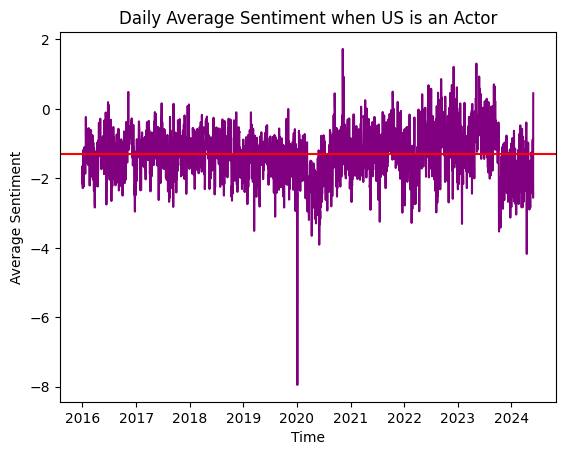

In [15]:
mu = country_daily_actor_senti['AvgSentiment'].mean()
#plt.figure(figsize=(20,10))
plt.plot(country_daily_actor_senti['Date'],country_daily_actor_senti['AvgSentiment'], color='purple')
plt.axhline(y=mu, color='red')
plt.title('Daily Average Sentiment when US is an Actor')
plt.xlabel('Time')
plt.ylabel('Average Sentiment')
print('Overall Average =',mu)

### Monthly Average Sentiments of Each Country when US is Actor 

In [16]:
country_monthly_actor = df_1.groupby(['YearMonth', 'TargetCountryName','ReceivingCountryName']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    TotalActionCount=('Action', 'count'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')
).reset_index()
country_monthly_actor

YearMonth TargetCountryName ReceivingCountryName  TotalArticleCount  \
0      2016-01               AUS                  USA                966   
1      2016-01               AUT                  USA                101   
2      2016-01               BEL                  USA                 36   
3      2016-01               BRA                  USA                321   
4      2016-01               CAN                  USA                773   
...        ...               ...                  ...                ...   
9059   2024-05               USA                  THA                  4   
9060   2024-05               USA                  TUR                102   
9061   2024-05               USA                  TWN                 56   
9062   2024-05               USA                  ZAF                 50   
9063   2024-05               ZAF                  USA                 51   

      TotalActionCount  AvgSentiment  AvgGoldsteinScale  
0                   87     -0.652499           1.734483  
1                   12     -2.482170           2.941667  
2                    9      0.609616           2.366667  
3                   29     -3.546212           0.241379  
4                  114     -0.685226           0.527193  
...                ...           ...                ...  
9059                 1      0.321543           1.000000  
9060                21     -0.694528           1.823810  
9061                11     -1.273784           2.345455  
9062                 7     -2.893863           0.857143  
9063                 6     -3.567868          -0.500000  

[9064 rows x 7 columns]

In [17]:
country_monthly_actor[country_monthly_actor['TargetCountryName']=='USA']

YearMonth TargetCountryName ReceivingCountryName  TotalArticleCount  \
44     2016-01               USA                  ARE                 20   
45     2016-01               USA                  AUS                781   
46     2016-01               USA                  AUT                166   
47     2016-01               USA                  BEL                 89   
48     2016-01               USA                  BRA                307   
...        ...               ...                  ...                ...   
9058   2024-05               USA                  SWE                 37   
9059   2024-05               USA                  THA                  4   
9060   2024-05               USA                  TUR                102   
9061   2024-05               USA                  TWN                 56   
9062   2024-05               USA                  ZAF                 50   

      TotalActionCount  AvgSentiment  AvgGoldsteinScale  
44                   4     -1.173705          -0.650000  
45                  77     -0.444740           1.393506  
46                  15     -2.309268           4.000000  
47                   9     -0.212593           3.566667  
48                  23     -2.650399           0.878261  
...                ...           ...                ...  
9058                 5     -2.594824          -0.120000  
9059                 1      0.321543           1.000000  
9060                21     -0.694528           1.823810  
9061                11     -1.273784           2.345455  
9062                 7     -2.893863           0.857143  

[4531 rows x 7 columns]

In [18]:
country_monthly_pivot_tar = country_monthly_actor.pivot_table(index='YearMonth', columns='ReceivingCountryName', values='AvgSentiment',fill_value=0)
country_monthly_pivot_tar.pop('USA')
country_monthly_pivot_tar
# US is Target Country

ReceivingCountryName       ARE       AUS       AUT       BEL       BRA  \
YearMonth                                                                
2016-01              -1.173705 -0.444740 -2.309268 -0.212593 -2.650399   
2016-02               2.146265 -1.473783 -0.064445 -2.194026 -3.463941   
2016-03               1.881292 -0.033652 -1.807923 -4.938312 -2.689140   
2016-04               0.581423 -1.055139 -0.876414 -4.197654 -1.529069   
2016-05              -0.946763 -1.330672 -2.286498 -1.217357 -2.574646   
...                        ...       ...       ...       ...       ...   
2024-01               1.694240 -1.685876  0.000000 -0.219591 -1.196287   
2024-02               3.978451 -0.510077  2.356730  0.164931 -1.986265   
2024-03               1.690141 -1.029886  1.224750 -1.450865 -0.954063   
2024-04               1.170296 -1.286843 -1.543210 -0.820349  1.154404   
2024-05               4.360071 -2.718802 -2.971912 -2.848039 -2.246384   

ReceivingCountryName       CAN       CHE       CHL       CHN       COL  ...  \
YearMonth                                                               ...   
2016-01              -0.264730 -0.395211  0.690177 -0.859086  0.551152  ...   
2016-02              -0.251731 -2.395642 -1.100471 -1.320887 -0.525351  ...   
2016-03               0.110490 -1.613805 -0.944042 -1.308018 -0.462972  ...   
2016-04              -0.234832 -1.650490 -0.163643 -1.601177 -0.060519  ...   
2016-05               0.082103 -1.126093  1.474605 -1.349065 -1.739044  ...   
...                        ...       ...       ...       ...       ...  ...   
2024-01              -0.267213 -0.405085 -2.348179 -1.355749 -4.034254  ...   
2024-02              -0.056829 -4.013870 -1.210287 -2.014700 -1.246965  ...   
2024-03              -0.230701 -0.605734  0.000000 -1.874091 -2.768631  ...   
2024-04               0.176441 -2.624027  5.535055 -1.945506 -1.638630  ...   
2024-05               1.811527 -3.177420  3.937623 -1.979824 -2.495876  ...   

ReceivingCountryName       POL       PRT       QAT       SAU       SGP  \
YearMonth                                                                
2016-01               0.965846 -5.277060 -1.651723 -3.600751  1.865743   
2016-02              -0.271855 -3.285480  0.207061 -1.609795  0.971718   
2016-03              -0.785688  1.150389 -1.254717 -1.945205 -1.826631   
2016-04              -0.665603  2.149763 -0.306743 -2.300679  1.251054   
2016-05              -1.544118 -1.960784 -1.255288 -2.308531  0.292128   
...                        ...       ...       ...       ...       ...   
2024-01               1.556391  1.449275 -2.988934 -2.760368  0.025516   
2024-02               0.016159  0.524476 -2.526097 -2.636492  0.239967   
2024-03              -0.338551  1.819356 -3.407479 -3.623206  0.281014   
2024-04              -1.970216  0.335570 -1.861169 -2.078779 -0.154708   
2024-05              -2.347011 -3.099174  0.400598 -1.434050  0.549432   

ReceivingCountryName       SWE       THA       TUR       TWN       ZAF  
YearMonth                                                               
2016-01               1.634508 -3.619683 -3.382867 -1.275196 -1.449285  
2016-02              -0.860432 -1.063712 -3.447721 -1.613305 -0.888667  
2016-03              -0.981858 -0.321994 -3.004228  1.413176 -0.364355  
2016-04              -0.264902 -0.232220 -3.331969 -1.055423 -1.242395  
2016-05              -0.600742 -1.366024 -2.415794  1.061602 -0.698785  
...                        ...       ...       ...       ...       ...  
2024-01               1.559989 -0.348567 -1.781484 -0.056771 -2.267078  
2024-02               1.135588  0.000000 -3.176607 -2.165245  2.150538  
2024-03               0.784599  0.000000 -0.437824 -0.938014  0.885666  
2024-04               0.057491 -0.830646 -2.065180  1.441465 -0.170327  
2024-05              -2.594824  0.321543 -0.694528 -1.273784 -2.893863  

[101 rows x 46 columns]

### Monthly Average Sentiments of Each Action when US is Actor 

In [19]:
action_monthly_actor = df_1.groupby(['YearMonth', 'Action Name']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')
).reset_index()
action_monthly_actor

YearMonth                                        Action Name  \
0       2016-01                    Abduct, hijack, or take hostage   
1       2016-01         Accede to demands for change in leadership   
2       2016-01                       Accede to demands for rights   
3       2016-01                               Accuse of aggression   
4       2016-01                      Accuse of human rights abuses   
...         ...                                                ...   
10912   2024-05                                            Torture   
10913   2024-05  Use conventional military force, not specified...   
10914   2024-05   Use unconventional violence, not specified below   
10915   2024-05                                               Veto   
10916   2024-05                         Yield, not specified below   

       TotalArticleCount  AvgSentiment  AvgGoldsteinScale  
0                     20     -1.808769               -9.0  
1                     50     -1.233684                5.0  
2                      7      0.456621                5.0  
3                      2    -11.328125               -2.0  
4                      8     -2.941176               -2.0  
...                  ...           ...                ...  
10912                 10     -5.819296               -9.0  
10913                165     -3.777737              -10.0  
10914                 79     -5.500760               -9.0  
10915                 24     -1.162770               -5.0  
10916                 69     -3.338455                5.0  

[10917 rows x 5 columns]

In [20]:
top_receiving_countries_monthly = country_monthly_actor.groupby('ReceivingCountryName')['TotalArticleCount'].sum().nlargest(12).index
print('Monthly Top 10 Receiving Countries:',top_receiving_countries_monthly.tolist())

top_target_countries_monthly = country_monthly_actor.groupby('TargetCountryName')['TotalArticleCount'].sum().nlargest(12).index
print('Monthly Top 10 Target Countries:',top_target_countries_monthly.tolist())

# USA and '0' shall not be considered

Monthly Top 10 Receiving Countries: ['USA', 'CHN', 'ISR', 'GBR', 'DEU', 'MEX', 'CAN', 'JPN', 'FRA', 'IND', 'TUR', 'SAU']
Monthly Top 10 Target Countries: ['USA', 'CHN', 'GBR', 'ISR', 'MEX', 'DEU', 'CAN', 'FRA', 'IND', 'JPN', 'TUR', 'SAU']


In [21]:
top_actions_monthly = action_monthly_actor.groupby('Action Name')['TotalArticleCount'].sum().nlargest(10).index
print('Monthy Top 10 Actions:',top_actions_monthly.tolist())

Monthy Top 10 Actions: ['Consult, not specified below', 'Engage in negotiation', 'Express intent to meet or negotiate', 'Make a visit', 'Make statement, not specified below', 'Praise or endorse', 'Host a visit', 'Make an appeal or request, not specified below', 'Criticize or denounce', 'Express intent to cooperate, not specified below']


### Overall When US is Actor

In [22]:
action_overall = df_1.groupby(['Action Name','Action']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')
).reset_index()
action_overall

Action Name  Action  \
0                      Abduct, hijack, or take hostage     181   
1           Accede to demands for change in leadership     831   
2                         Accede to demands for rights     833   
3    Accede to requests or demands for political re...      83   
4                                 Accuse of aggression    1123   
..                                                 ...     ...   
216                  Use tactics of violent repression     175   
217   Use unconventional violence, not specified below     180   
218                                               Veto     129   
219                                  Violate ceasefire     196   
220                         Yield, not specified below      80   

     TotalArticleCount  AvgSentiment  AvgGoldsteinScale  
0                  429     -3.248636               -9.0  
1                 6800     -1.985177                5.0  
2                  506     -1.275060                5.0  
3                  451     -1.560348                5.0  
4                  780     -4.589706               -2.0  
..                 ...           ...                ...  
216                 71     -4.077825               -9.0  
217               3743     -4.162935               -9.0  
218               5579     -3.310853               -5.0  
219                  6     -0.159744               -9.5  
220              19686     -1.726114                5.0  

[221 rows x 5 columns]

In [23]:
action_overall[action_overall['Action'] == 40]

Action Name  Action  TotalArticleCount  AvgSentiment  \
51  Consult, not specified below      40             505791     -0.830219   

    AvgGoldsteinScale  
51                1.0

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


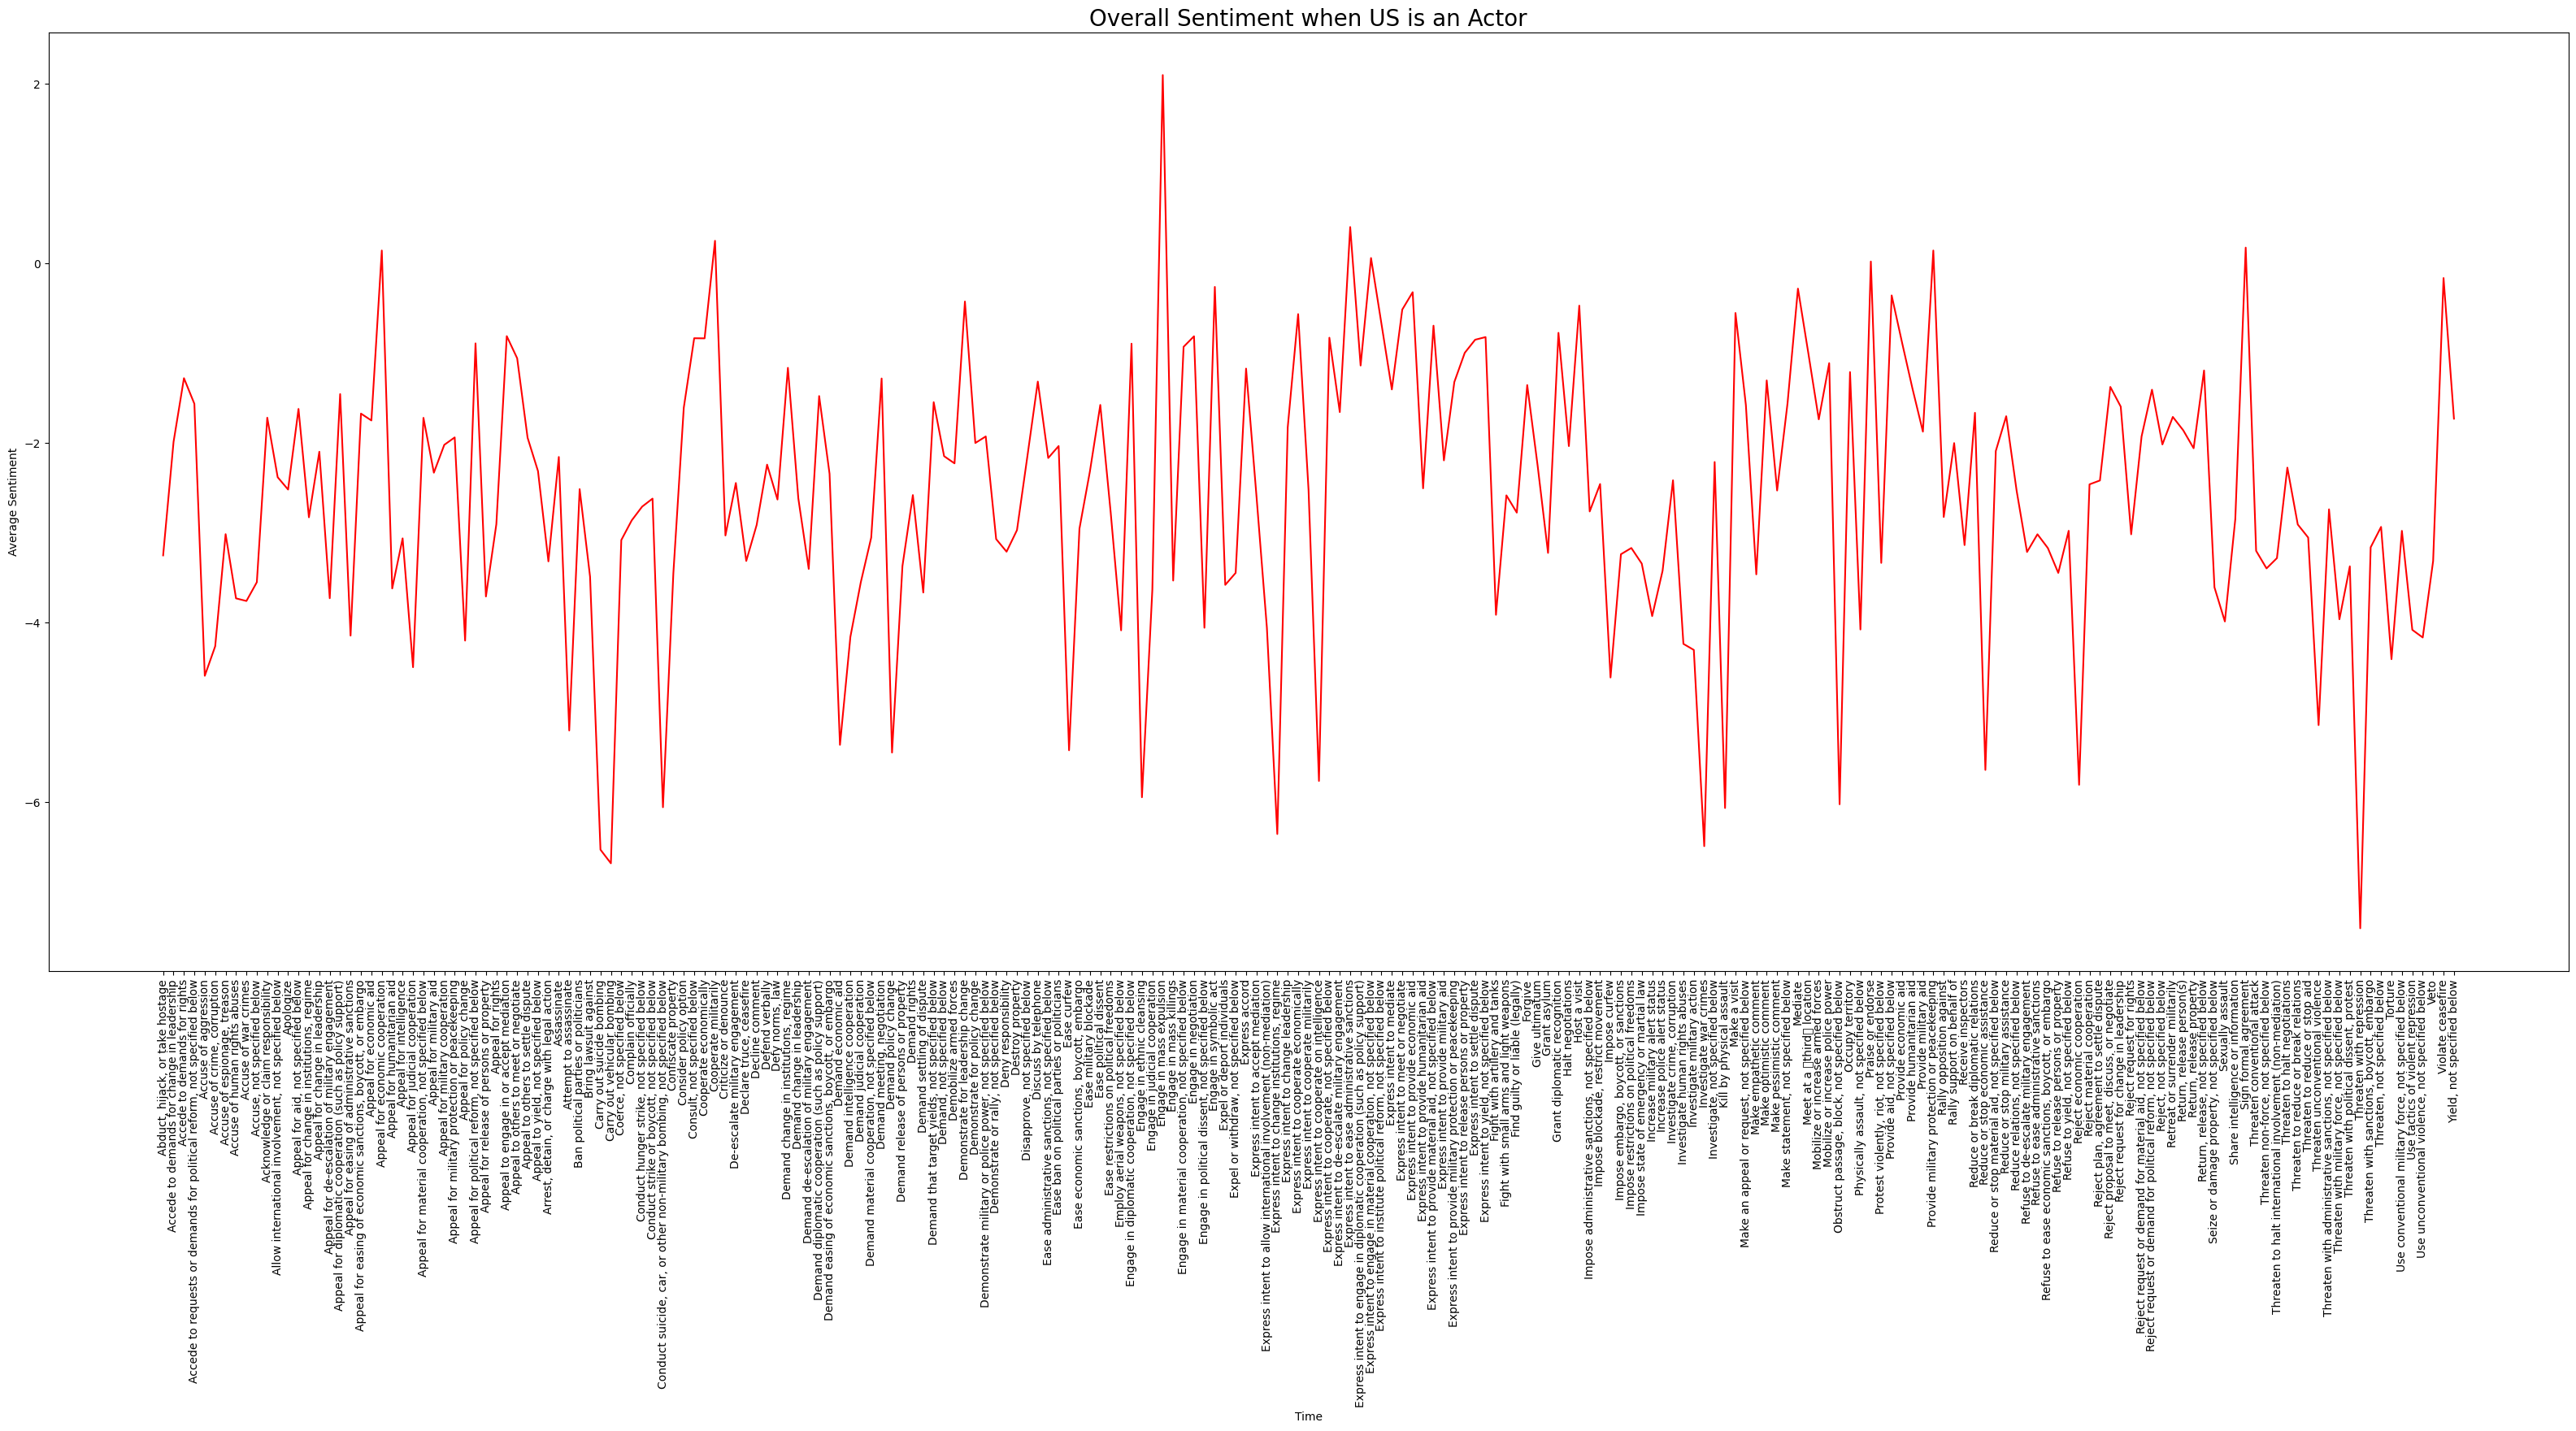

In [24]:
plt.figure(figsize = (40,15))
plt.plot(action_overall['Action Name'],action_overall['AvgSentiment'],color = 'red')
plt.xticks(rotation='vertical')
plt.title('Overall Sentiment when US is an Actor', fontsize = 20)
plt.xlabel('Time')
plt.ylabel('Average Sentiment')
plt.show()

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


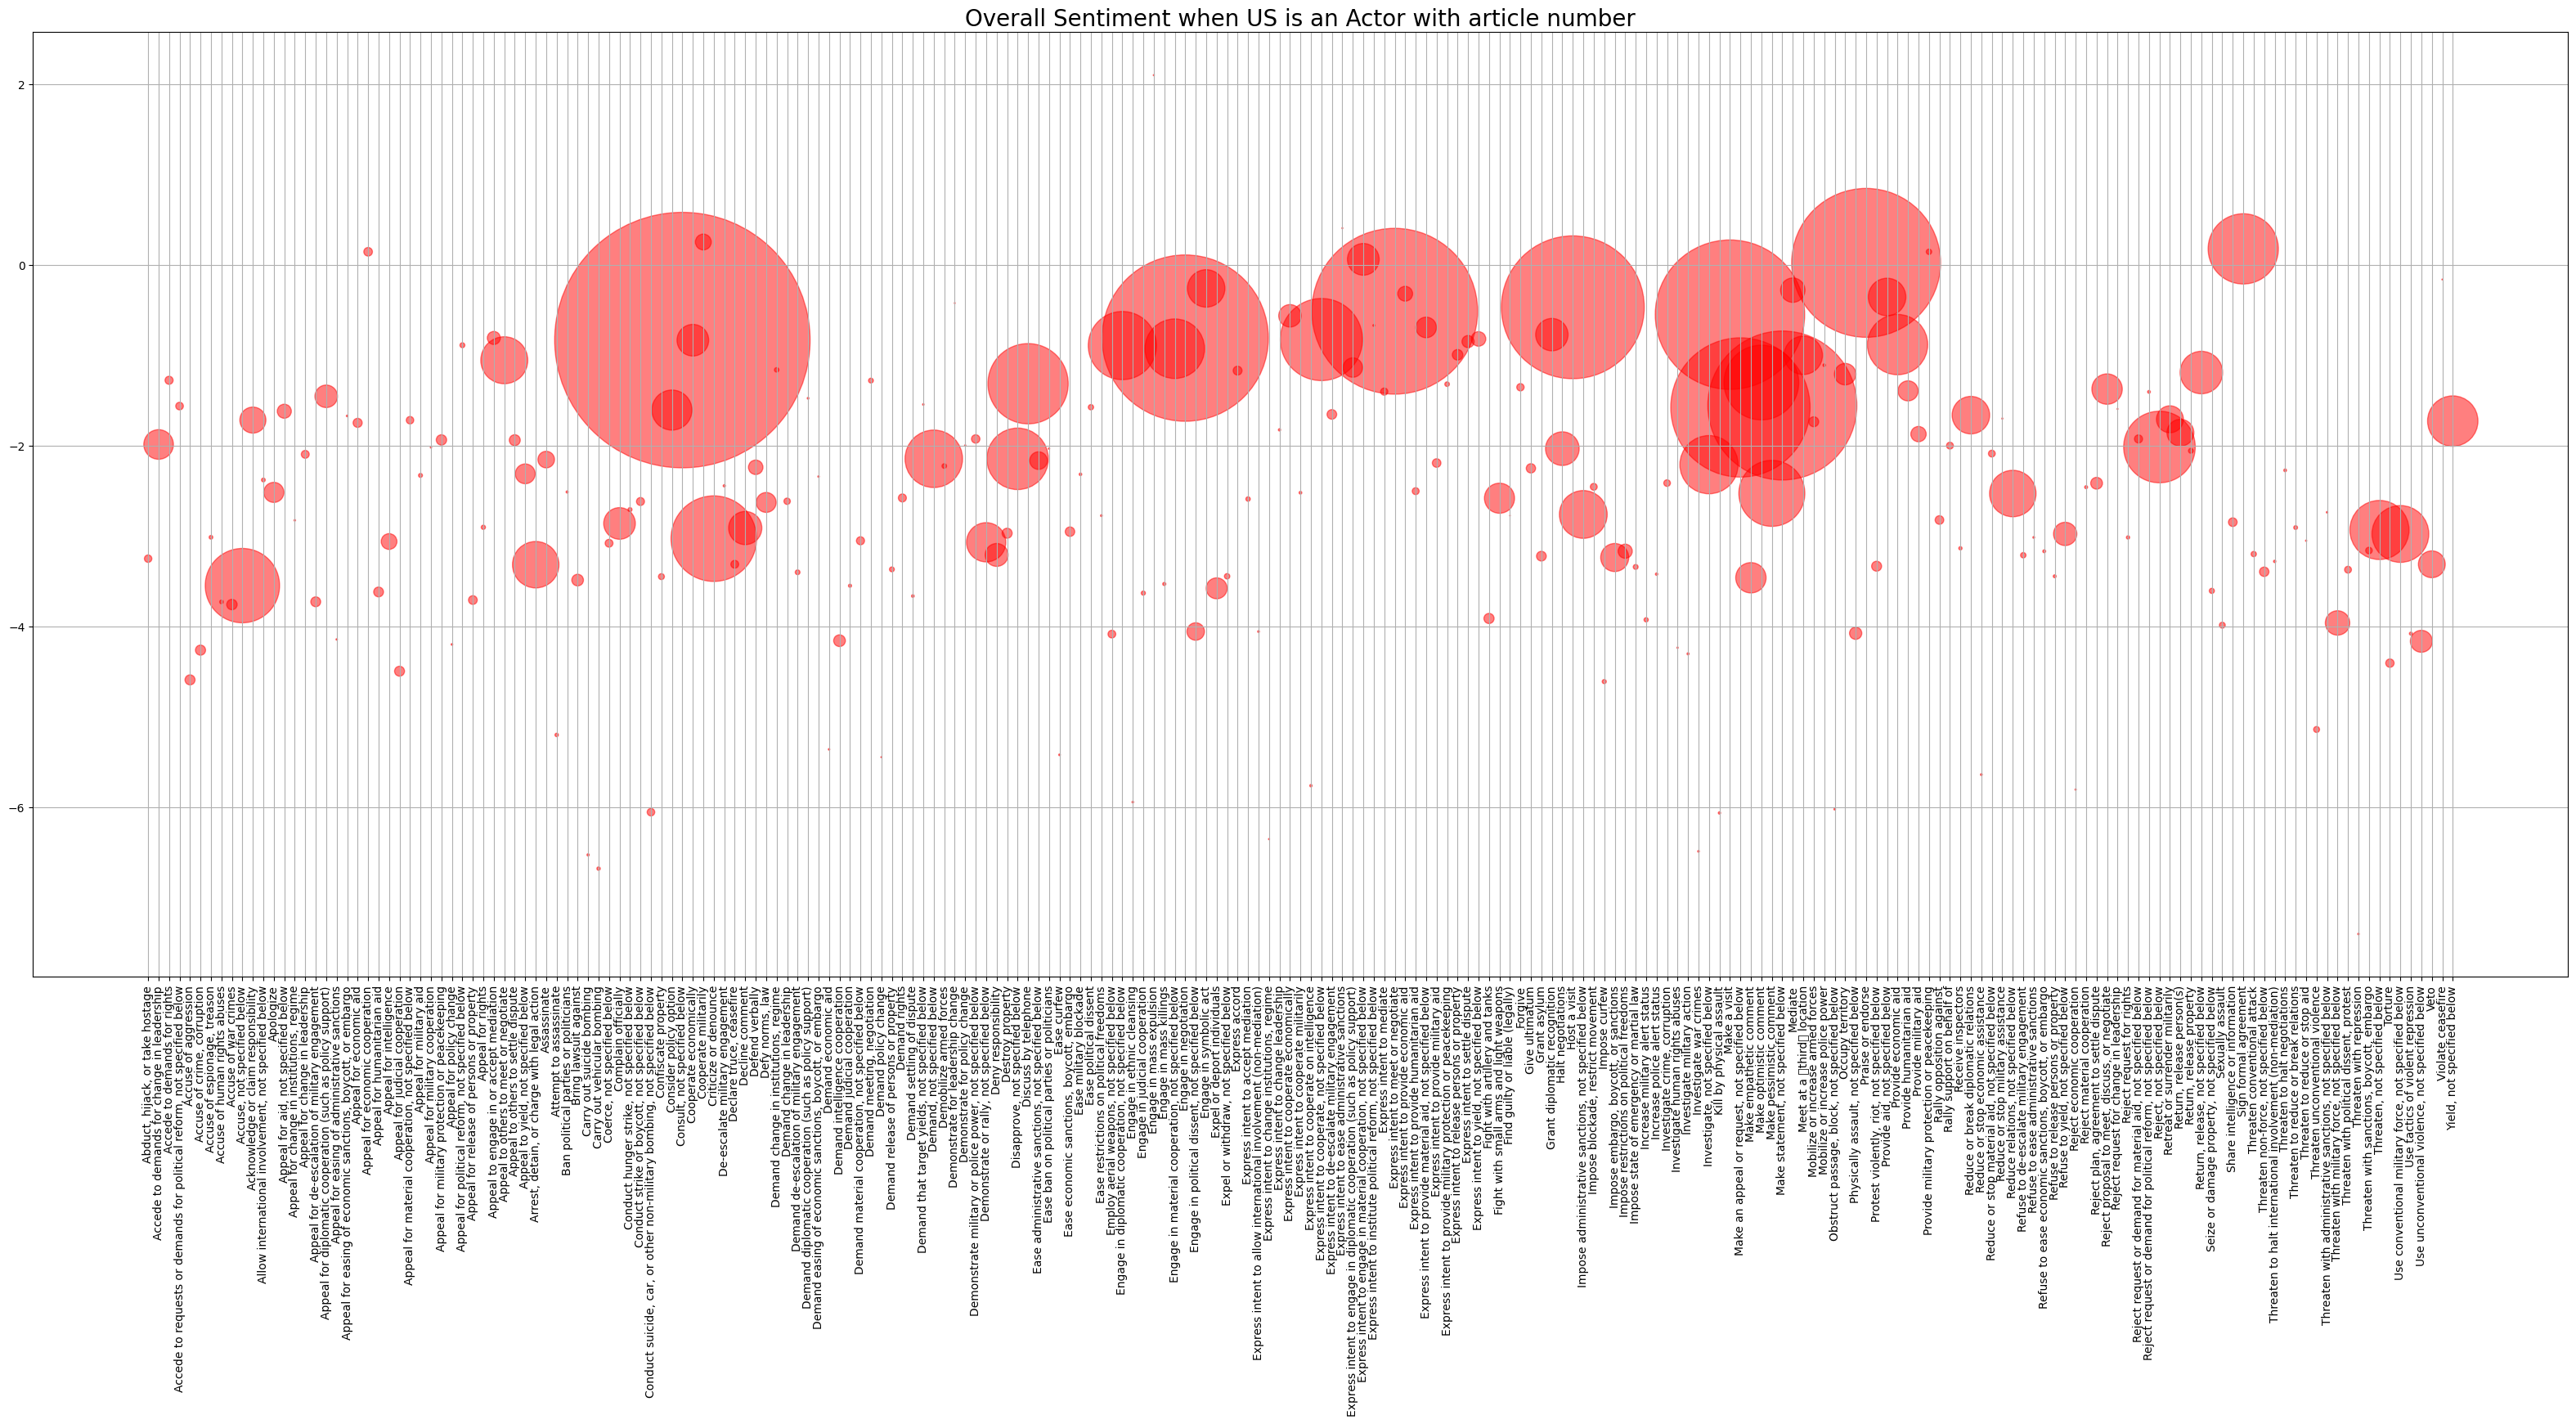

In [25]:
plt.figure(figsize = (40,15))
plt.scatter(action_overall['Action Name'],action_overall['AvgSentiment'], s = action_overall['TotalArticleCount']*0.1, alpha=0.5, color = 'red')
plt.xticks(rotation='vertical')
plt.title('Overall Sentiment when US is an Actor with article number', fontsize = 20)
plt.grid()
plt.show()

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


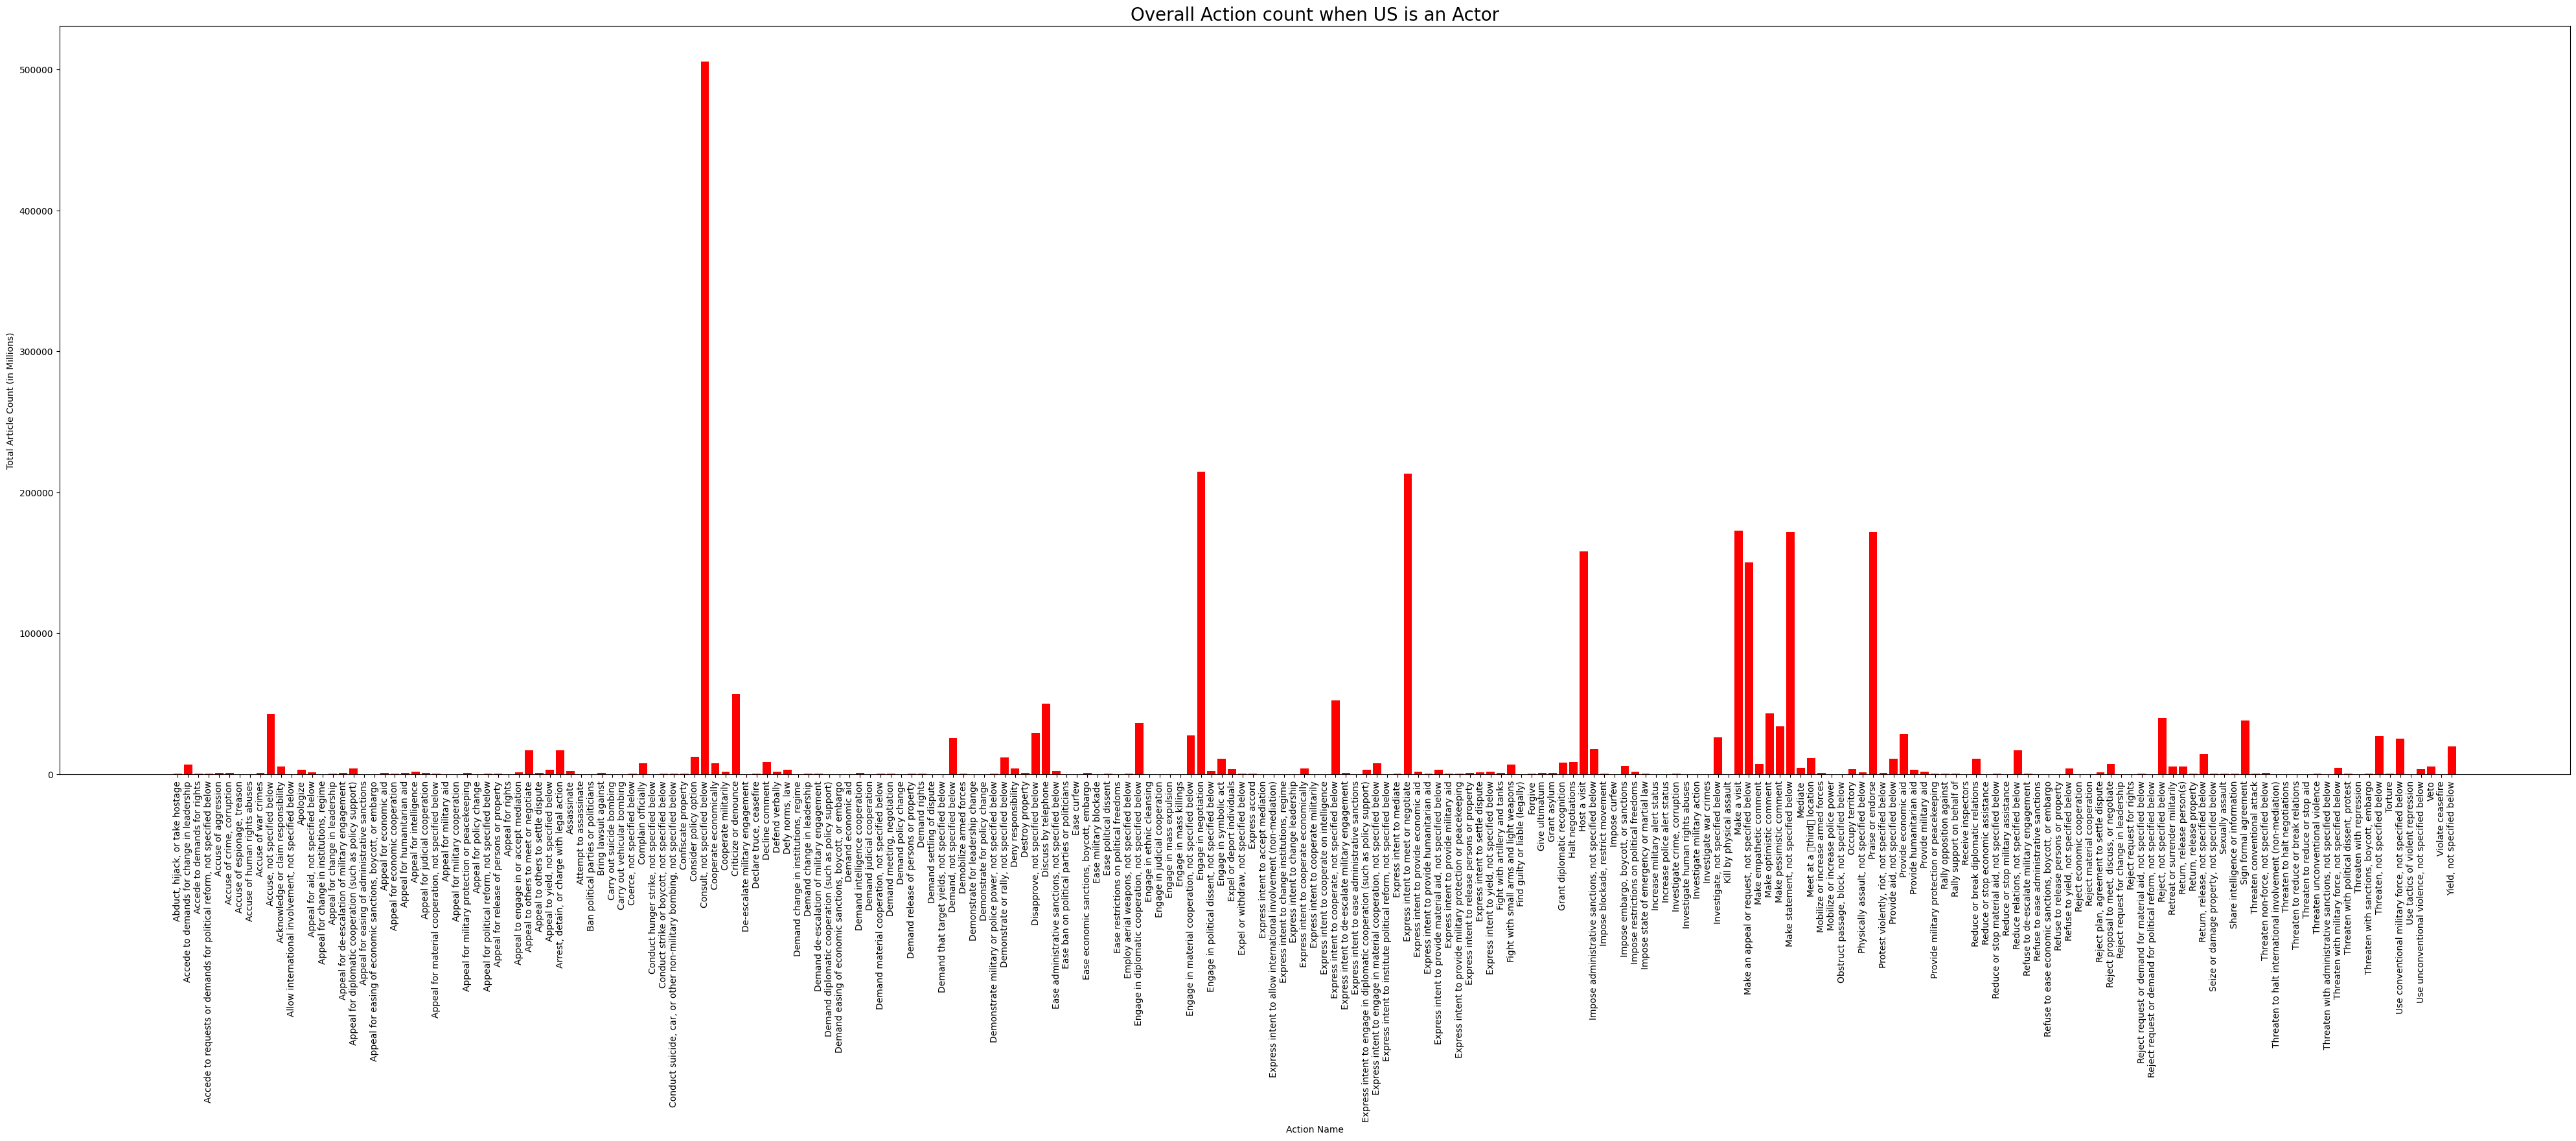

In [26]:
plt.figure(figsize = (50,15))
plt.bar(action_overall['Action Name'],action_overall['TotalArticleCount'],color = 'red')
plt.xticks(rotation='vertical')
plt.title('Overall Action count when US is an Actor', fontsize = 20)
plt.xlabel('Action Name')
plt.ylabel('Total Article Count (in Millions)')
plt.show()

#### When US is Target Country

In [27]:
overall_country = df_1.groupby(['ReceivingCountryName']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')
).reset_index()
overall_country.drop(overall_country[overall_country['ReceivingCountryName']=='USA'].index, inplace=True)

In [28]:
overall_country

ReceivingCountryName  TotalArticleCount  AvgSentiment  AvgGoldsteinScale
0                   ARE               5475      0.351362           2.313374
1                   AUS              36405     -0.993812           1.828631
2                   AUT               3430     -1.354329           1.992969
3                   BEL              10297     -1.448166           1.700073
4                   BRA              17472     -1.558286           1.371737
5                   CAN              65416     -0.675553           1.644149
6                   CHE              12124     -1.298894           1.791110
7                   CHL               6818     -0.991085           1.673073
8                   CHN             166663     -1.867009           1.199093
9                   COL              15908     -0.999221           1.889145
10                  CZE               4723     -0.789245           2.190385
11                  DEU              84418     -1.478567           1.640720
12                  DNK               4103     -0.596635           1.535495
13                  EGY              25806     -1.423023           1.791717
14                  ESP              19589     -0.814038           1.807171
15                  FIN               6875     -1.147726           2.315324
16                  FRA              58528     -1.240534           1.524608
17                  GBR             150368     -1.220861           1.297230
18                  GRC              20623     -0.451710           1.800669
19                  HKG               2596     -3.004160           0.957277
20                  HUN               6875     -0.623713           1.479877
21                  IDN              10522     -0.414614           1.896211
22                  IND              58192     -0.097134           2.020236
23                  IRL              17082     -0.365552           1.720195
24                  ISR             154818     -1.821881           1.324969
25                  ITA              21011     -0.794054           1.896876
26                  JPN              60758     -0.748947           2.316694
27                  KOR              33894     -1.014770           2.078217
28                  KWT               1804      0.436488           1.833582
29                  MEX              75657     -1.582077           1.484401
30                  MYS               3866     -1.334902           1.438907
31                  NLD               6397     -0.813677           2.136713
32                  NOR               6820     -0.778862           1.749045
33                  NZL               7585     -0.783917           1.785503
34                  PER               7958     -1.091441           1.869607
35                  PHL              25095     -1.215024           1.536979
36                  POL              14801     -0.942231           2.066588
37                  PRT               2057     -0.008498           1.745752
38                  QAT               5767     -0.811491           2.121178
39                  SAU              44793     -1.685924           1.443831
40                  SGP              10155     -0.087413           2.550472
41                  SWE               7822     -0.994747           1.839524
42                  THA               4059     -0.862134           1.777639
43                  TUR              49399     -2.577895           1.089294
44                  TWN               8275     -0.809633           1.946074
46                  ZAF               7131     -1.221097           1.547102

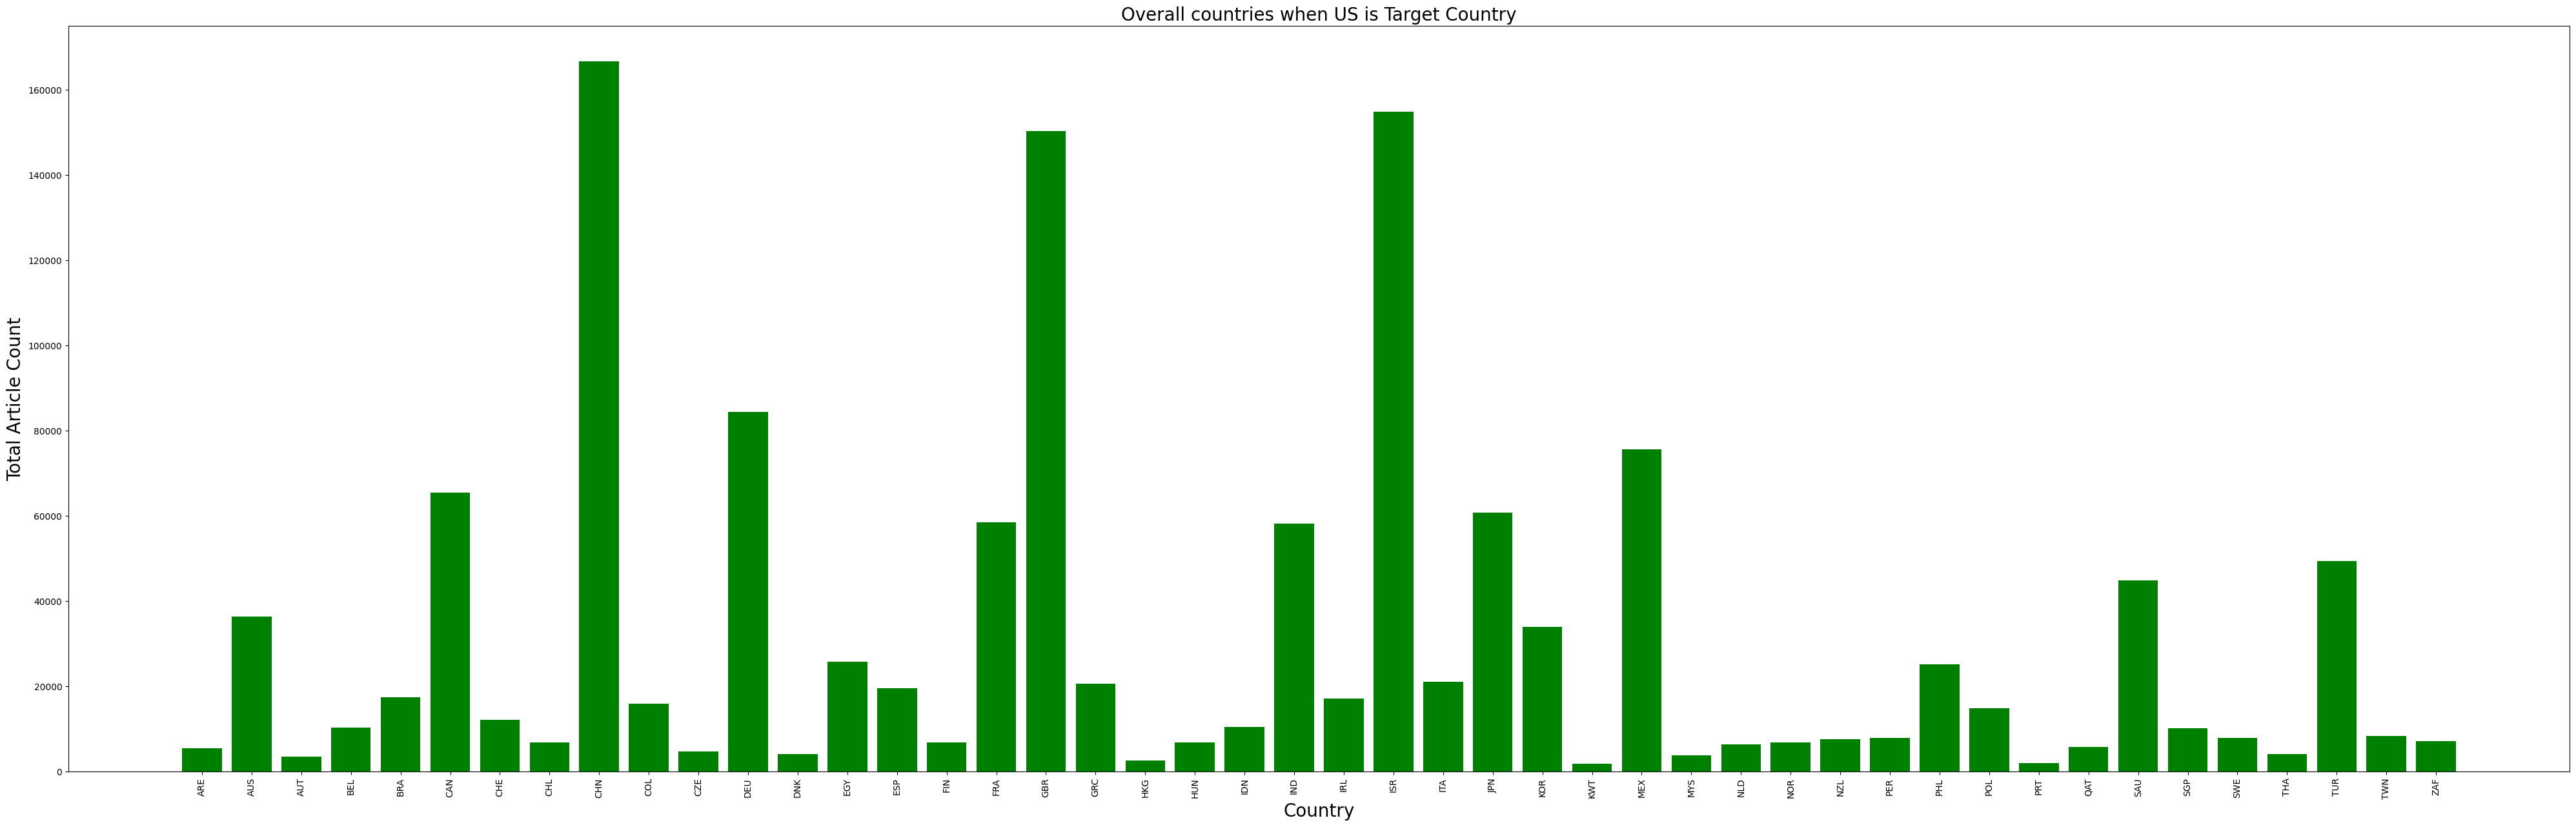

In [29]:
plt.figure(figsize = (50,15))
plt.bar(overall_country['ReceivingCountryName'],overall_country['TotalArticleCount'],color = 'green')
plt.xticks(rotation='vertical')
plt.title('Overall countries when US is Target Country', fontsize = 20)
plt.xlabel('Country',fontsize = 20)
plt.ylabel('Total Article Count',fontsize = 20)
plt.show()

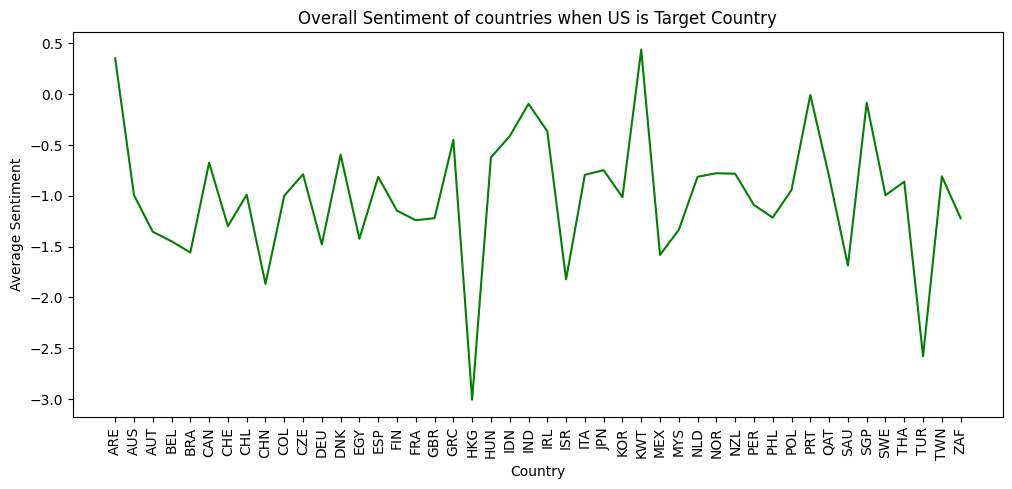

In [30]:
plt.figure(figsize = (12,5))
plt.plot(overall_country['ReceivingCountryName'],overall_country['AvgSentiment'],color = 'green')
plt.xticks(rotation='vertical')
plt.title('Overall Sentiment of countries when US is Target Country')
plt.xlabel('Country')
plt.ylabel('Average Sentiment')
plt.show()

# US Recipient

In [42]:
df_2 = pd.DataFrame(us_recipient)

df_2.drop(df_2[(df_2['TargetCountryName'] == 'USA') & (df_2['ReceivingCountryName'] == 'USA')].index, inplace = True)
df_2.drop(df_2[(df_2['TargetCountryName'] == 0) | (df_2['ReceivingCountryName'] == 0)].index, inplace = True)
df_2 = df_2.reset_index()

df_2['Date'] = pd.to_datetime(df_2['Date'], format='%Y%m%d')
df_2['Date'].dtype
df_2['YearMonth'] = df_2['Date'].dt.to_period('M')

df_2

index       Date  TargetCountry  TargetCountryCode  ReceivingCountry  \
0            0 2016-01-01            NaN                  1                 1   
1            1 2016-01-01            NaN                  1                 1   
2            2 2016-01-01            NaN                  1                 1   
3            3 2016-01-01            NaN                  1                 1   
4            4 2016-01-01            NaN                  1                 1   
...        ...        ...            ...                ...               ...   
169315  335291 2024-05-27           13.0                  1                 1   
169316  335292 2024-05-27            NaN                  1                 1   
169317  335297 2024-05-28            8.0                  1                 1   
169318  335299 2024-05-28           43.0                  1                 1   
169319  335300 2024-05-28           23.0                  1                 1   

        ReceivingCountryCode  Action  NumArticles   AvgTone  \
0                          1      18            5  1.036269   
1                          2      45            4  1.123596   
2                          1      55           10 -0.534759   
3                          1    1124           10  0.716846   
4                          1     128            6 -5.830904   
...                      ...     ...          ...       ...   
169315                     1      43           10 -6.632653   
169316                     1      46           10  5.932203   
169317                     1      40            6  1.067616   
169318                     1      43            2  1.960784   
169319                     1      46           10  1.562500   

        AvgGoldsteinScale TargetCountryName ReceivingCountryName  \
0                     3.4                 0                  USA   
1                     5.0                 0                  USA   
2                     7.0                 0                  USA   
3                    -2.0                 0                  USA   
4                    -5.0                 0                  USA   
...                   ...               ...                  ...   
169315                2.8               ITA                  USA   
169316                7.0                 0                  USA   
169317                1.0               FRA                  USA   
169318                2.8               KOR                  USA   
169319                7.0               GBR                  USA   

                         Action Name YearMonth  
0            Make empathetic comment   2016-01  
1                            Mediate   2016-01  
2                          Apologize   2016-01  
3               Accuse of war crimes   2016-01  
4                    Defy norms, law   2016-01  
...                              ...       ...  
169315                  Host a visit   2024-05  
169316         Engage in negotiation   2024-05  
169317  Consult, not specified below   2024-05  
169318                  Host a visit   2024-05  
169319         Engage in negotiation   2024-05  

[169320 rows x 14 columns]

In [65]:
df_2.drop(df_2[(df_2['TargetCountryName']=='USA') & (df_2['ReceivingCountryName']=='USA')].index,inplace=True)
df_2.drop(df_2[(df_2['TargetCountryName']== '0') | (df_2['ReceivingCountryName']== '0')].index,inplace=True)

### Daily Average Sentiments of Each Country when US is Recipient

In [66]:
daily_country_rec = df_2.groupby(['Date','TargetCountryName']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')
).reset_index()
daily_country_rec

Date TargetCountryName  TotalArticleCount  AvgSentiment  \
0     2016-01-01               CHE                  8     -2.983425   
1     2016-01-01               CHN                 17     -1.608773   
2     2016-01-01               DEU                 29     -0.594357   
3     2016-01-01               FRA                  8      0.457328   
4     2016-01-01               GBR                  2     -4.305556   
...          ...               ...                ...           ...   
50872 2024-05-27               SGP                 11     -0.680201   
50873 2024-05-27               TWN                  3      0.503461   
50874 2024-05-28               FRA                  6      1.067616   
50875 2024-05-28               GBR                 10      1.562500   
50876 2024-05-28               KOR                  2      1.960784   

       AvgGoldsteinScale  
0                   2.80  
1                   5.20  
2                   2.80  
3                   1.00  
4                   3.50  
...                  ...  
50872               2.20  
50873               2.55  
50874               1.00  
50875               7.00  
50876               2.80  

[50877 rows x 5 columns]

In [67]:
country_daily_pivot_rec = daily_country_rec.pivot_table(index='Date', columns='TargetCountryName', values='AvgSentiment',fill_value=0)
country_daily_pivot_rec
# US is Recipient Country

TargetCountryName       ARE       AUS       AUT  BEL  BRA       CAN       CHE  \
Date                                                                            
2016-01-01         0.000000  0.000000  0.000000  0.0  0.0  0.000000 -2.983425   
2016-01-02         0.000000 -1.821862  0.000000  0.0  0.0  0.000000  0.000000   
2016-01-03         0.000000 -1.518027 -0.900277  0.0  0.0  1.625554  0.000000   
2016-01-04         0.000000  3.820225 -2.643172  0.0  0.0  0.000000  0.000000   
2016-01-05         0.000000  1.008065 -2.724715  0.0  0.0  1.813999 -6.436119   
...                     ...       ...       ...  ...  ...       ...       ...   
2024-05-24        -0.574713  0.000000  0.000000  0.0  0.0 -1.561269  0.000000   
2024-05-25         0.000000  1.477833  0.000000  0.0  0.0  0.000000  0.000000   
2024-05-26         0.000000 -3.180574  0.000000  0.0  0.0  0.000000  1.029516   
2024-05-27         0.000000 -6.896552  0.000000  0.0  0.0  1.060860 -0.935829   
2024-05-28         0.000000  0.000000  0.000000  0.0  0.0  0.000000  0.000000   

TargetCountryName       CHL       CHN       COL  ...  POL  PRT       QAT  \
Date                                             ...                       
2016-01-01         0.000000 -1.608773  0.000000  ...  0.0  0.0  0.000000   
2016-01-02         0.000000  3.166344  0.842105  ...  0.0  0.0  0.000000   
2016-01-03         0.000000 -2.432922  0.729927  ...  0.0  0.0  0.000000   
2016-01-04         0.000000 -1.003749  0.369461  ...  0.0  0.0  0.000000   
2016-01-05         0.000000 -1.476222  0.000000  ...  0.0  0.0 -3.606429   
...                     ...       ...       ...  ...  ...  ...       ...   
2024-05-24        -2.469136 -3.130922  0.000000  ...  0.0  0.0  0.000000   
2024-05-25         0.000000 -4.606235  0.000000  ...  0.0  0.0  0.000000   
2024-05-26         0.000000  0.187713  0.000000  ...  0.0  0.0  0.000000   
2024-05-27         0.000000  0.334453  0.000000  ...  0.0  0.0  0.000000   
2024-05-28         0.000000  0.000000  0.000000  ...  0.0  0.0  0.000000   

TargetCountryName       SAU       SGP  SWE  THA       TUR       TWN  ZAF  
Date                                                                      
2016-01-01         0.000000  0.000000  0.0  0.0 -1.554002  0.000000  0.0  
2016-01-02         0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.0  
2016-01-03         0.000000  0.000000  0.0  0.0 -4.000000  0.000000  0.0  
2016-01-04        -3.538179  1.518219  0.0  0.0  0.000000  0.000000 -3.0  
2016-01-05        -1.408451  0.000000  0.0  0.0 -3.173912  0.000000  0.0  
...                     ...       ...  ...  ...       ...       ...  ...  
2024-05-24         0.000000 -6.451613  0.0  0.0  0.000000  0.000000  0.0  
2024-05-25         0.000000  2.283307  0.0  0.0  0.000000  0.000000  0.0  
2024-05-26        -5.253236  0.000000  0.0  0.0  0.159490 -0.301205  0.0  
2024-05-27        -4.118616 -0.680201  0.0  0.0  0.000000  0.503461  0.0  
2024-05-28         0.000000  0.000000  0.0  0.0  0.000000  0.000000  0.0  

[3069 rows x 46 columns]

In [68]:
top_countries_daily_rec = daily_country_rec.groupby('TargetCountryName')['TotalArticleCount'].sum().nlargest(10).index
print('Daily Top 10 Target Countries:',top_countries_daily_rec.tolist())

Daily Top 10 Target Countries: ['CHN', 'GBR', 'ISR', 'DEU', 'MEX', 'CAN', 'JPN', 'IND', 'FRA', 'TUR']


In [70]:
country_daily_pivot_rec[top_countries_daily_rec]

TargetCountryName       CHN       GBR       ISR       DEU       MEX       CAN  \
Date                                                                            
2016-01-01        -1.608773 -4.305556 -1.031876 -0.594357 -7.377049  0.000000   
2016-01-02         3.166344  0.000000 -4.311111 -3.412311  0.000000  0.000000   
2016-01-03        -2.432922 -2.811245 -2.127660  0.556700  0.000000  1.625554   
2016-01-04        -1.003749 -2.137529 -4.050362  0.519658  1.986097  0.000000   
2016-01-05        -1.476222 -2.941176 -0.210546 -0.912646  0.000000  1.813999   
...                     ...       ...       ...       ...       ...       ...   
2024-05-24        -3.130922  1.887494 -1.250072  2.702703  0.000000 -1.561269   
2024-05-25        -4.606235  0.000000 -1.313875  0.000000  0.000000  0.000000   
2024-05-26         0.187713  0.000000 -3.344266  0.000000  0.000000  0.000000   
2024-05-27         0.334453 -4.485483 -5.800367 -5.322129  0.000000  1.060860   
2024-05-28         0.000000  1.562500  0.000000  0.000000  0.000000  0.000000   

TargetCountryName       JPN       IND       FRA       TUR  
Date                                                       
2016-01-01         2.026504  0.000000  0.457328 -1.554002  
2016-01-02         0.000000  1.694915 -2.444988  0.000000  
2016-01-03         0.000000  1.058201 -2.879079 -4.000000  
2016-01-04         0.483092  2.264151 -2.743798  0.000000  
2016-01-05         2.247191 -2.444705 -3.899070 -3.173912  
...                     ...       ...       ...       ...  
2024-05-24         0.835655  0.000000 -4.363002  0.000000  
2024-05-25        -2.021978  1.343293 -3.624733  0.000000  
2024-05-26         0.000000  0.000000  0.000000  0.159490  
2024-05-27         0.000000  0.000000  0.000000  0.000000  
2024-05-28         0.000000  0.000000  1.067616  0.000000  

[3069 rows x 10 columns]

### Daily Average Sentiments of Each Action when US is Recipient

In [71]:
daily_action_rec = df_2.groupby(['Date','Action Name']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')
).reset_index()
daily_action_rec

Date                                        Action Name  \
0     2016-01-01                               Accuse of aggression   
1     2016-01-01                       Consult, not specified below   
2     2016-01-01  Engage in diplomatic cooperation, not specifie...   
3     2016-01-01                              Engage in negotiation   
4     2016-01-01   Express intent to cooperate, not specified below   
...          ...                                                ...   
45730 2024-05-27                         Meet at a third location   
45731 2024-05-27  Threaten with military force, not specified below   
45732 2024-05-28                       Consult, not specified below   
45733 2024-05-28                              Engage in negotiation   
45734 2024-05-28                                       Host a visit   

       TotalArticleCount  AvgSentiment  AvgGoldsteinScale  
0                      2    -11.328125               -2.0  
1                     15      1.702519                1.0  
2                      2     -4.305556                3.5  
3                      7     -1.883645                7.0  
4                      8     -2.242152                4.0  
...                  ...           ...                ...  
45730                  6     -4.118616                2.5  
45731                 10     -7.931034               -7.0  
45732                  6      1.067616                1.0  
45733                 10      1.562500                7.0  
45734                  2      1.960784                2.8  

[45735 rows x 5 columns]

In [72]:
top_daily_action_rec = daily_action_rec.groupby('Action Name')['TotalArticleCount'].sum().nlargest(15).index
print('Daily Top 10 Actions when US is Recipient',top_daily_action_rec.tolist())

Daily Top 10 Actions when US is Recipient ['Consult, not specified below', 'Engage in negotiation', 'Express intent to meet or negotiate', 'Make a visit', 'Make statement, not specified below', 'Praise or endorse', 'Make an appeal or request, not specified below', 'Host a visit', 'Express intent to cooperate, not specified below', 'Discuss by telephone', 'Make optimistic comment', 'Engage in diplomatic cooperation, not specified below', 'Make pessimistic comment', 'Appeal to others to meet or negotiate', 'Consider policy option']


In [73]:
daily_action_senti_rec = df_2.groupby(['Date']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')
).reset_index()
daily_action_senti_rec

Date  TotalArticleCount  AvgSentiment  AvgGoldsteinScale
0    2016-01-01                118     -2.332695           2.711111
1    2016-01-02                113     -1.390638           2.141176
2    2016-01-03                178     -0.962750           2.995833
3    2016-01-04                245     -1.083454           3.105882
4    2016-01-05                305     -1.740511           1.342500
...         ...                ...           ...                ...
3064 2024-05-24                233     -0.962636           1.911765
3065 2024-05-25                132     -0.965575           2.257895
3066 2024-05-26                141     -1.442112           2.024000
3067 2024-05-27                153     -2.860349           1.266667
3068 2024-05-28                 18      1.530300           3.600000

[3069 rows x 4 columns]

Overall Average = -1.0697633810824645


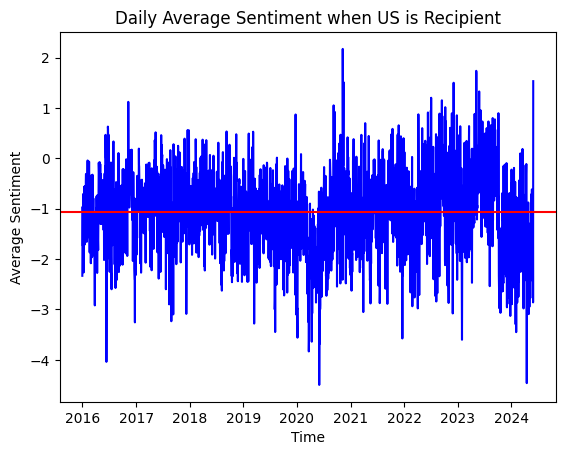

In [74]:
avg = daily_action_senti_rec['AvgSentiment'].mean()
#plt.figure(figsize =(40,15))
plt.plot(daily_action_senti_rec['Date'],daily_action_senti_rec['AvgSentiment'],color = 'blue')
plt.axhline(y=avg, color='red')
plt.title('Daily Average Sentiment when US is Recipient')
plt.xlabel('Time')
plt.ylabel('Average Sentiment')
print('Overall Average =',avg)
plt.show()

### Monthly Average Sentiments of Each Country when US is Recipient

In [75]:
monthly_country_rec = df_2.groupby(['YearMonth','TargetCountryName']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')
).reset_index()
#monthly_country_rec

In [76]:
country_monthly_pivot_rec = monthly_country_rec.pivot_table(index='YearMonth', columns='TargetCountryName', values='AvgSentiment',fill_value=0)
country_monthly_pivot_rec
# US is Recipient Country

TargetCountryName       ARE       AUS       AUT       BEL       BRA       CAN  \
YearMonth                                                                       
2016-01            0.000000 -0.369827 -2.495913  0.432915 -3.772307  0.026069   
2016-02            2.550755 -1.451925  1.660810 -0.073623 -3.913530 -0.029472   
2016-03            2.260261 -0.357992 -0.600691 -5.132736 -2.127945  0.245501   
2016-04           -0.080057  0.031792 -2.150980 -2.843807 -2.182366  0.398785   
2016-05            0.584616 -1.126411 -1.145088 -1.130408 -2.366281 -0.113523   
...                     ...       ...       ...       ...       ...       ...   
2024-01            3.895512 -1.085361  0.000000  3.473945  1.430795 -1.465206   
2024-02            0.945212 -2.972684  0.171233  0.071291 -2.217066  0.157771   
2024-03            1.690141 -0.477573  1.917612  2.083333 -0.741518  0.042729   
2024-04           -0.676924 -0.690976  0.388254  1.311464  2.115231 -2.046178   
2024-05            0.703169 -1.688662 -1.749219 -0.749596 -1.054423 -0.034867   

TargetCountryName       CHE       CHL       CHN       COL  ...       POL  \
YearMonth                                                  ...             
2016-01           -1.948294  0.452959 -0.761216  0.519920  ... -0.353287   
2016-02           -2.606744 -0.638592 -0.815383 -0.395050  ... -0.808833   
2016-03           -1.953644 -0.652175 -1.153489 -0.404815  ... -1.024929   
2016-04           -1.184720  1.248355 -1.575137 -1.804694  ...  0.191755   
2016-05           -1.348163  1.177293 -1.351125 -0.513015  ... -3.401249   
...                     ...       ...       ...       ...  ...       ...   
2024-01           -1.178591 -3.060844 -0.679877 -2.346169  ...  1.389290   
2024-02           -1.944059 -2.671756 -1.680157  0.048937  ...  0.254167   
2024-03           -1.811150 -3.214190 -2.150969 -6.729715  ... -0.449800   
2024-04            2.611061 -0.846214 -1.565945 -0.978139  ... -0.924511   
2024-05           -0.371144  0.428761 -1.747787 -1.168297  ... -3.358454   

TargetCountryName       PRT       QAT       SAU       SGP       SWE       THA  \
YearMonth                                                                       
2016-01           -2.272727 -2.040368 -1.807903  0.750070 -1.225774 -1.333261   
2016-02            1.585205  1.964233 -1.501762  1.151286 -1.278510 -1.379848   
2016-03            0.000000  0.000000 -1.837263 -1.394097 -0.533893 -0.060798   
2016-04            4.534000 -0.998792 -1.848591  0.533284 -0.629636  0.329083   
2016-05            0.000000  1.157009 -2.527143 -0.290584  0.173568 -1.854920   
...                     ...       ...       ...       ...       ...       ...   
2024-01            2.153209 -3.820702 -3.300738  1.386275  1.713700 -1.150738   
2024-02            0.000000 -2.073097 -2.786919 -1.555141  3.773739 -0.418410   
2024-03            0.000000 -4.937717 -2.397141  0.337494  1.076674 -2.296450   
2024-04           -2.195090 -2.589434 -3.587950 -0.048117  0.000000  0.331876   
2024-05           -3.128057  0.852201 -0.914055 -1.630157 -2.807968  0.000000   

TargetCountryName       TUR       TWN       ZAF  
YearMonth                                        
2016-01           -3.086428 -1.881397 -4.361225  
2016-02           -2.801051 -1.270340 -0.602938  
2016-03           -2.203669  0.473430  1.363765  
2016-04           -2.967079  0.269527  0.908975  
2016-05           -2.464994  0.035482  0.642632  
...                     ...       ...       ...  
2024-01           -0.488873 -0.517665 -0.739372  
2024-02            0.312037  1.444574  1.900269  
2024-03           -0.607819  3.390927 -4.045422  
2024-04           -1.612768  1.567812  2.065165  
2024-05           -0.827952 -0.897559 -3.724937  

[101 rows x 46 columns]

In [77]:
top_countries_monthly_rec = monthly_country_rec.groupby('TargetCountryName')['TotalArticleCount'].sum().nlargest(10).index
print('Monthly Top 10 Target Countries:',top_countries_monthly_rec.tolist())

Monthly Top 10 Target Countries: ['CHN', 'GBR', 'ISR', 'DEU', 'MEX', 'CAN', 'JPN', 'IND', 'FRA', 'TUR']


In [78]:
country_monthly_pivot_rec[top_countries_monthly_rec]

TargetCountryName       CHN       GBR       ISR       DEU       MEX       CAN  \
YearMonth                                                                       
2016-01           -0.761216 -1.827636 -1.721979 -1.495793 -2.252456  0.026069   
2016-02           -0.815383 -1.575170 -1.392537 -1.271522 -1.215640 -0.029472   
2016-03           -1.153489 -1.301047 -2.287567 -1.880718 -1.206813  0.245501   
2016-04           -1.575137 -0.113101 -1.731345 -0.469683 -0.507427  0.398785   
2016-05           -1.351125 -0.608667 -0.856120 -1.047680 -0.797542 -0.113523   
...                     ...       ...       ...       ...       ...       ...   
2024-01           -0.679877 -1.563283 -3.849626 -0.301666 -2.169300 -1.465206   
2024-02           -1.680157 -0.239656 -3.829885 -2.017314 -2.402109  0.157771   
2024-03           -2.150969 -0.245196 -3.496660 -1.233932 -2.300950  0.042729   
2024-04           -1.565945 -0.706386 -3.836241 -0.683279 -2.247133 -2.046178   
2024-05           -1.747787 -2.072050 -3.333824 -1.675426 -2.664218 -0.034867   

TargetCountryName       JPN       IND       FRA       TUR  
YearMonth                                                  
2016-01           -0.545062 -0.718913 -1.613704 -3.086428  
2016-02           -1.208707 -0.123200 -0.779599 -2.801051  
2016-03           -1.341674 -0.758442 -2.682558 -2.203669  
2016-04           -1.544050 -0.137536 -1.810633 -2.967079  
2016-05           -1.975745  0.190900 -0.784710 -2.464994  
...                     ...       ...       ...       ...  
2024-01           -0.724949  1.195653 -1.159441 -0.488873  
2024-02            0.320631  0.114928 -1.905562  0.312037  
2024-03            0.320862  0.193006  0.095753 -0.607819  
2024-04           -0.072724 -1.496667 -2.601703 -1.612768  
2024-05           -0.589905 -1.798453 -0.291622 -0.827952  

[101 rows x 10 columns]

### Monthly Average Sentiments of Each Action when US is Recipient

In [53]:
monthly_action_rec = df_2.groupby(['YearMonth','Action Name']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')
).reset_index()
monthly_action_rec

YearMonth                                        Action Name  \
0      2016-01                               Accuse of aggression   
1      2016-01                      Accuse of human rights abuses   
2      2016-01                               Accuse of war crimes   
3      2016-01                Acknowledge or claim responsibility   
4      2016-01                                          Apologize   
...        ...                                                ...   
8204   2024-05  Threaten with military force, not specified below   
8205   2024-05          Threaten with sanctions, boycott, embargo   
8206   2024-05                                            Torture   
8207   2024-05   Use unconventional violence, not specified below   
8208   2024-05                                               Veto   

      TotalArticleCount  AvgSentiment  AvgGoldsteinScale  
0                     2    -11.328125               -2.0  
1                     8     -2.941176               -2.0  
2                    25     -1.576289               -2.0  
3                   109     -4.434777                0.0  
4                    42     -1.118210                7.0  
...                 ...           ...                ...  
8204                 64     -4.373910               -7.0  
8205                  3     -1.519757               -5.8  
8206                 10     -5.819296               -9.0  
8207                 26     -6.509204               -9.0  
8208                 44     -4.202063               -5.0  

[8209 rows x 5 columns]

In [54]:
top_action_monthly_rec = monthly_action_rec.groupby('Action Name')['TotalArticleCount'].sum().nlargest(10).index
print('Monthly Top 10 Target Countries:',top_action_monthly_rec.tolist())

Monthly Top 10 Target Countries: ['Consult, not specified below', 'Engage in negotiation', 'Make statement, not specified below', 'Express intent to meet or negotiate', 'Make a visit', 'Praise or endorse', 'Make an appeal or request, not specified below', 'Host a visit', 'Discuss by telephone', 'Express intent to cooperate, not specified below']


In [55]:
montly_action_senti_rec = df_2.groupby(['YearMonth']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')
).reset_index()
montly_action_senti_rec

YearMonth  TotalArticleCount  AvgSentiment  AvgGoldsteinScale
0     2016-01              23033     -1.338072           2.176362
1     2016-02              28398     -0.998710           2.347268
2     2016-03              38475     -1.334756           2.082384
3     2016-04              41032     -1.076865           2.320404
4     2016-05              28645     -0.958285           2.180539
..        ...                ...           ...                ...
96    2024-01              10838     -1.444830           2.034757
97    2024-02              11634     -1.536497           1.842057
98    2024-03              13445     -1.202585           1.930267
99    2024-04              15238     -1.672553           1.967793
100   2024-05               9381     -1.502567           1.953707

[101 rows x 4 columns]

In [56]:
top_actions_monthly_rec = monthly_action_rec.groupby('Action Name')['TotalArticleCount'].sum().nlargest(10).index
print('Monthy Top 10 Actions:',top_actions_monthly_rec.tolist())

Monthy Top 10 Actions: ['Consult, not specified below', 'Engage in negotiation', 'Make statement, not specified below', 'Express intent to meet or negotiate', 'Make a visit', 'Praise or endorse', 'Make an appeal or request, not specified below', 'Host a visit', 'Discuss by telephone', 'Express intent to cooperate, not specified below']


### Overall Sentiments of Each Action when US is Recipient

In [57]:
action_overall_rec = df_2.groupby(['Action Name','Action']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')
).reset_index()
action_overall_rec

Action Name  Action  \
0                      Abduct, hijack, or take hostage     181   
1                         Accede to demands for rights     833   
2    Accede to requests or demands for political re...      83   
3                                 Accuse of aggression    1123   
4                          Accuse of crime, corruption    1121   
..                                                 ...     ...   
189                                            Torture    1822   
190                  Use tactics of violent repression     175   
191   Use unconventional violence, not specified below     180   
192                                               Veto     129   
193                                  Violate ceasefire     196   

     TotalArticleCount  AvgSentiment  AvgGoldsteinScale  
0                  634     -3.149295               -9.0  
1                  535     -1.721522                5.0  
2                  605     -1.659186                5.0  
3                  703     -5.030627               -2.0  
4                  223     -3.441282               -2.0  
..                 ...           ...                ...  
189                417     -4.392664               -9.0  
190                 54     -5.080817               -9.0  
191               4039     -4.368351               -9.0  
192               3655     -3.515264               -5.0  
193                 14     -0.712784               -9.5  

[194 rows x 5 columns]

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


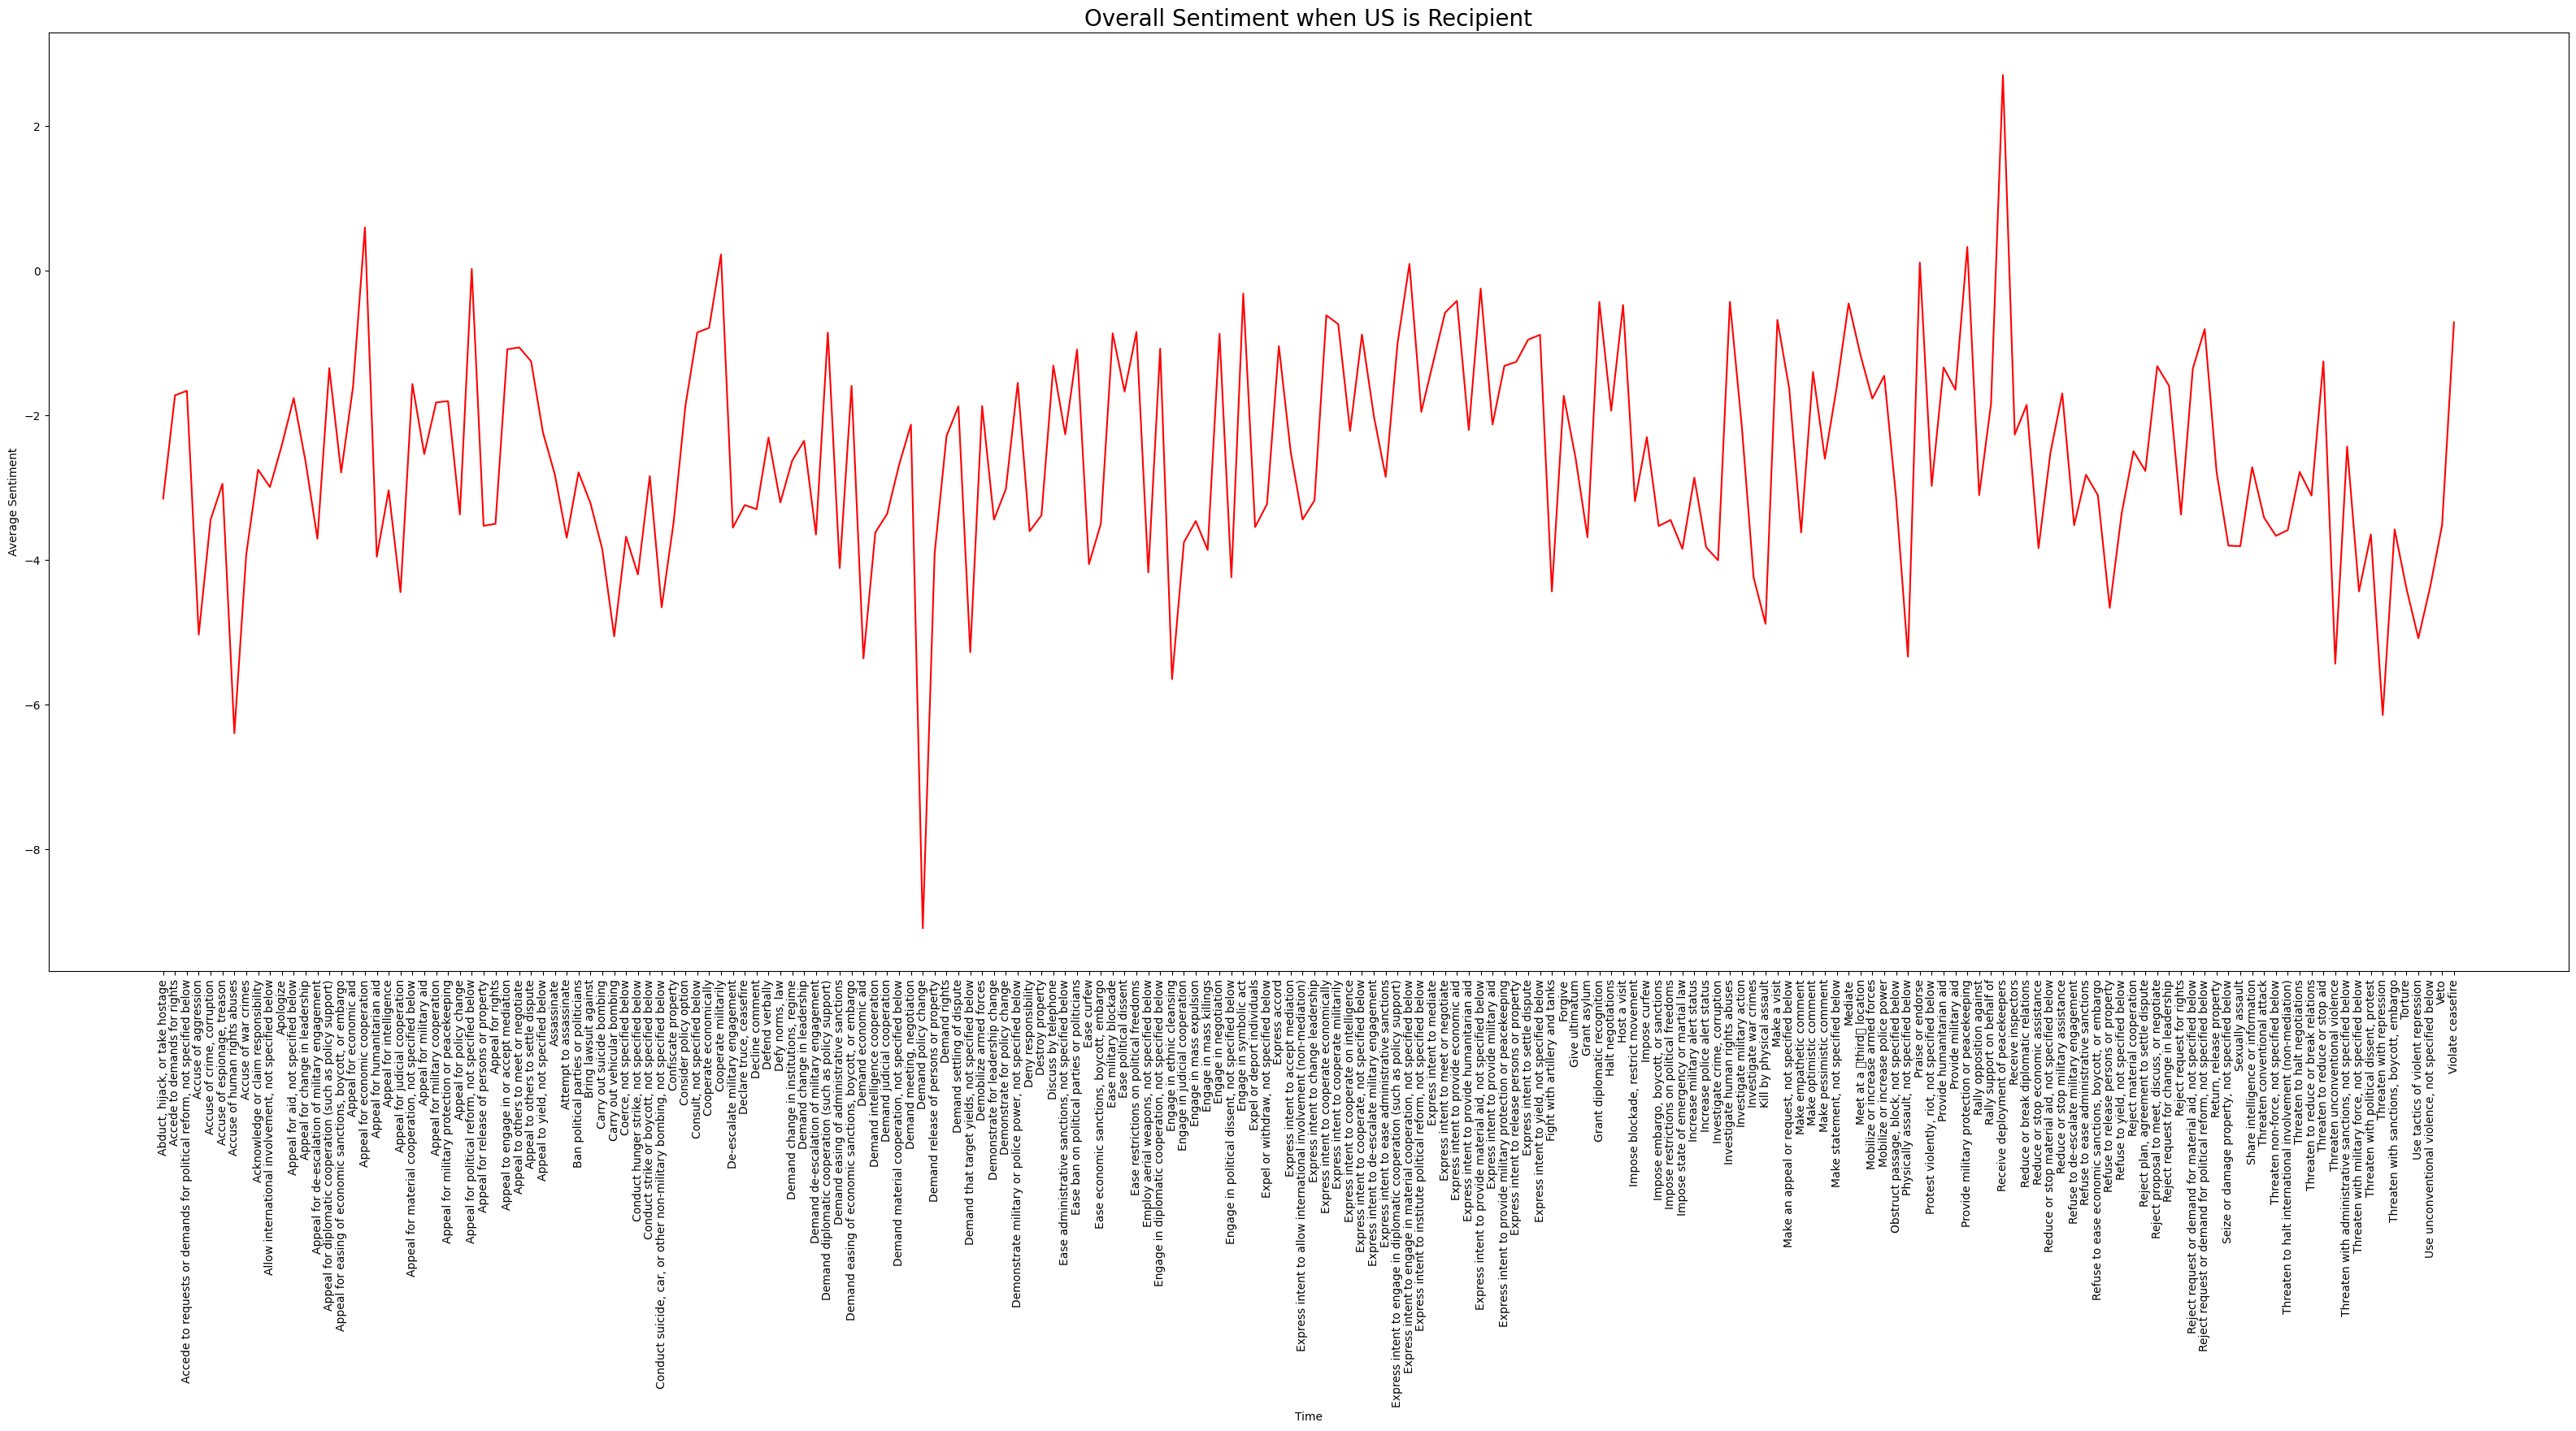

In [58]:
plt.figure(figsize = (40,15))
plt.plot(action_overall_rec['Action Name'],action_overall_rec['AvgSentiment'],color = 'red')
plt.xticks(rotation='vertical')
plt.title('Overall Sentiment when US is Recipient', fontsize = 20)
plt.xlabel('Time')
plt.ylabel('Average Sentiment')
plt.show()

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


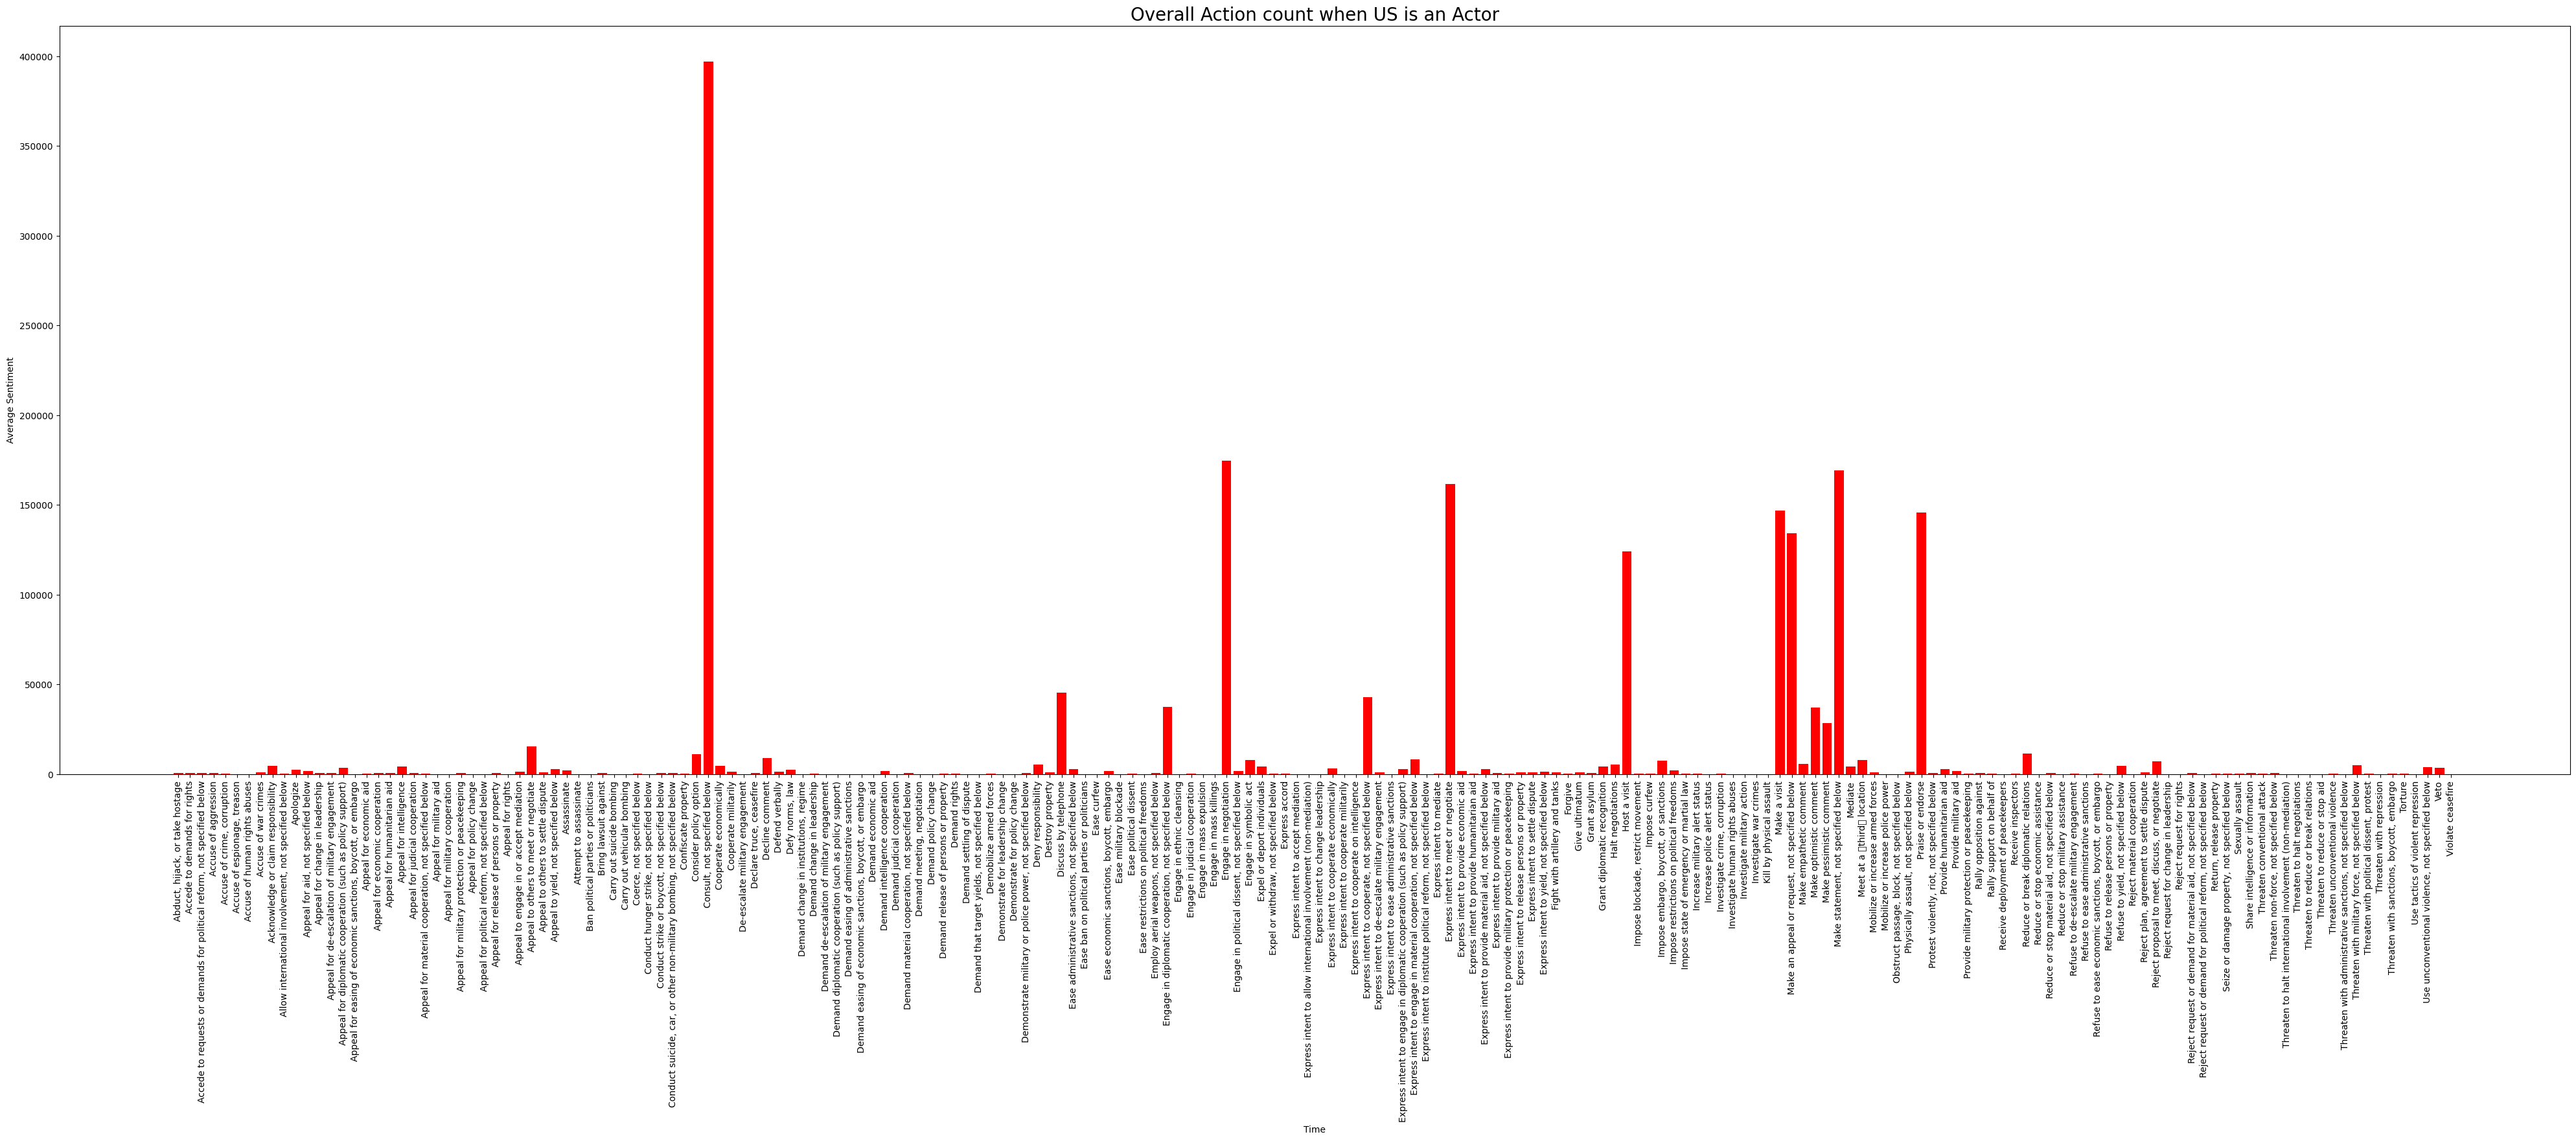

In [59]:
plt.figure(figsize = (50,15))
plt.bar(action_overall_rec['Action Name'],action_overall_rec['TotalArticleCount'],color = 'red')
plt.xticks(rotation='vertical')
plt.title('Overall Action count when US is an Actor', fontsize = 20)
plt.ylabel('Total Article Count')
plt.show()

C:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


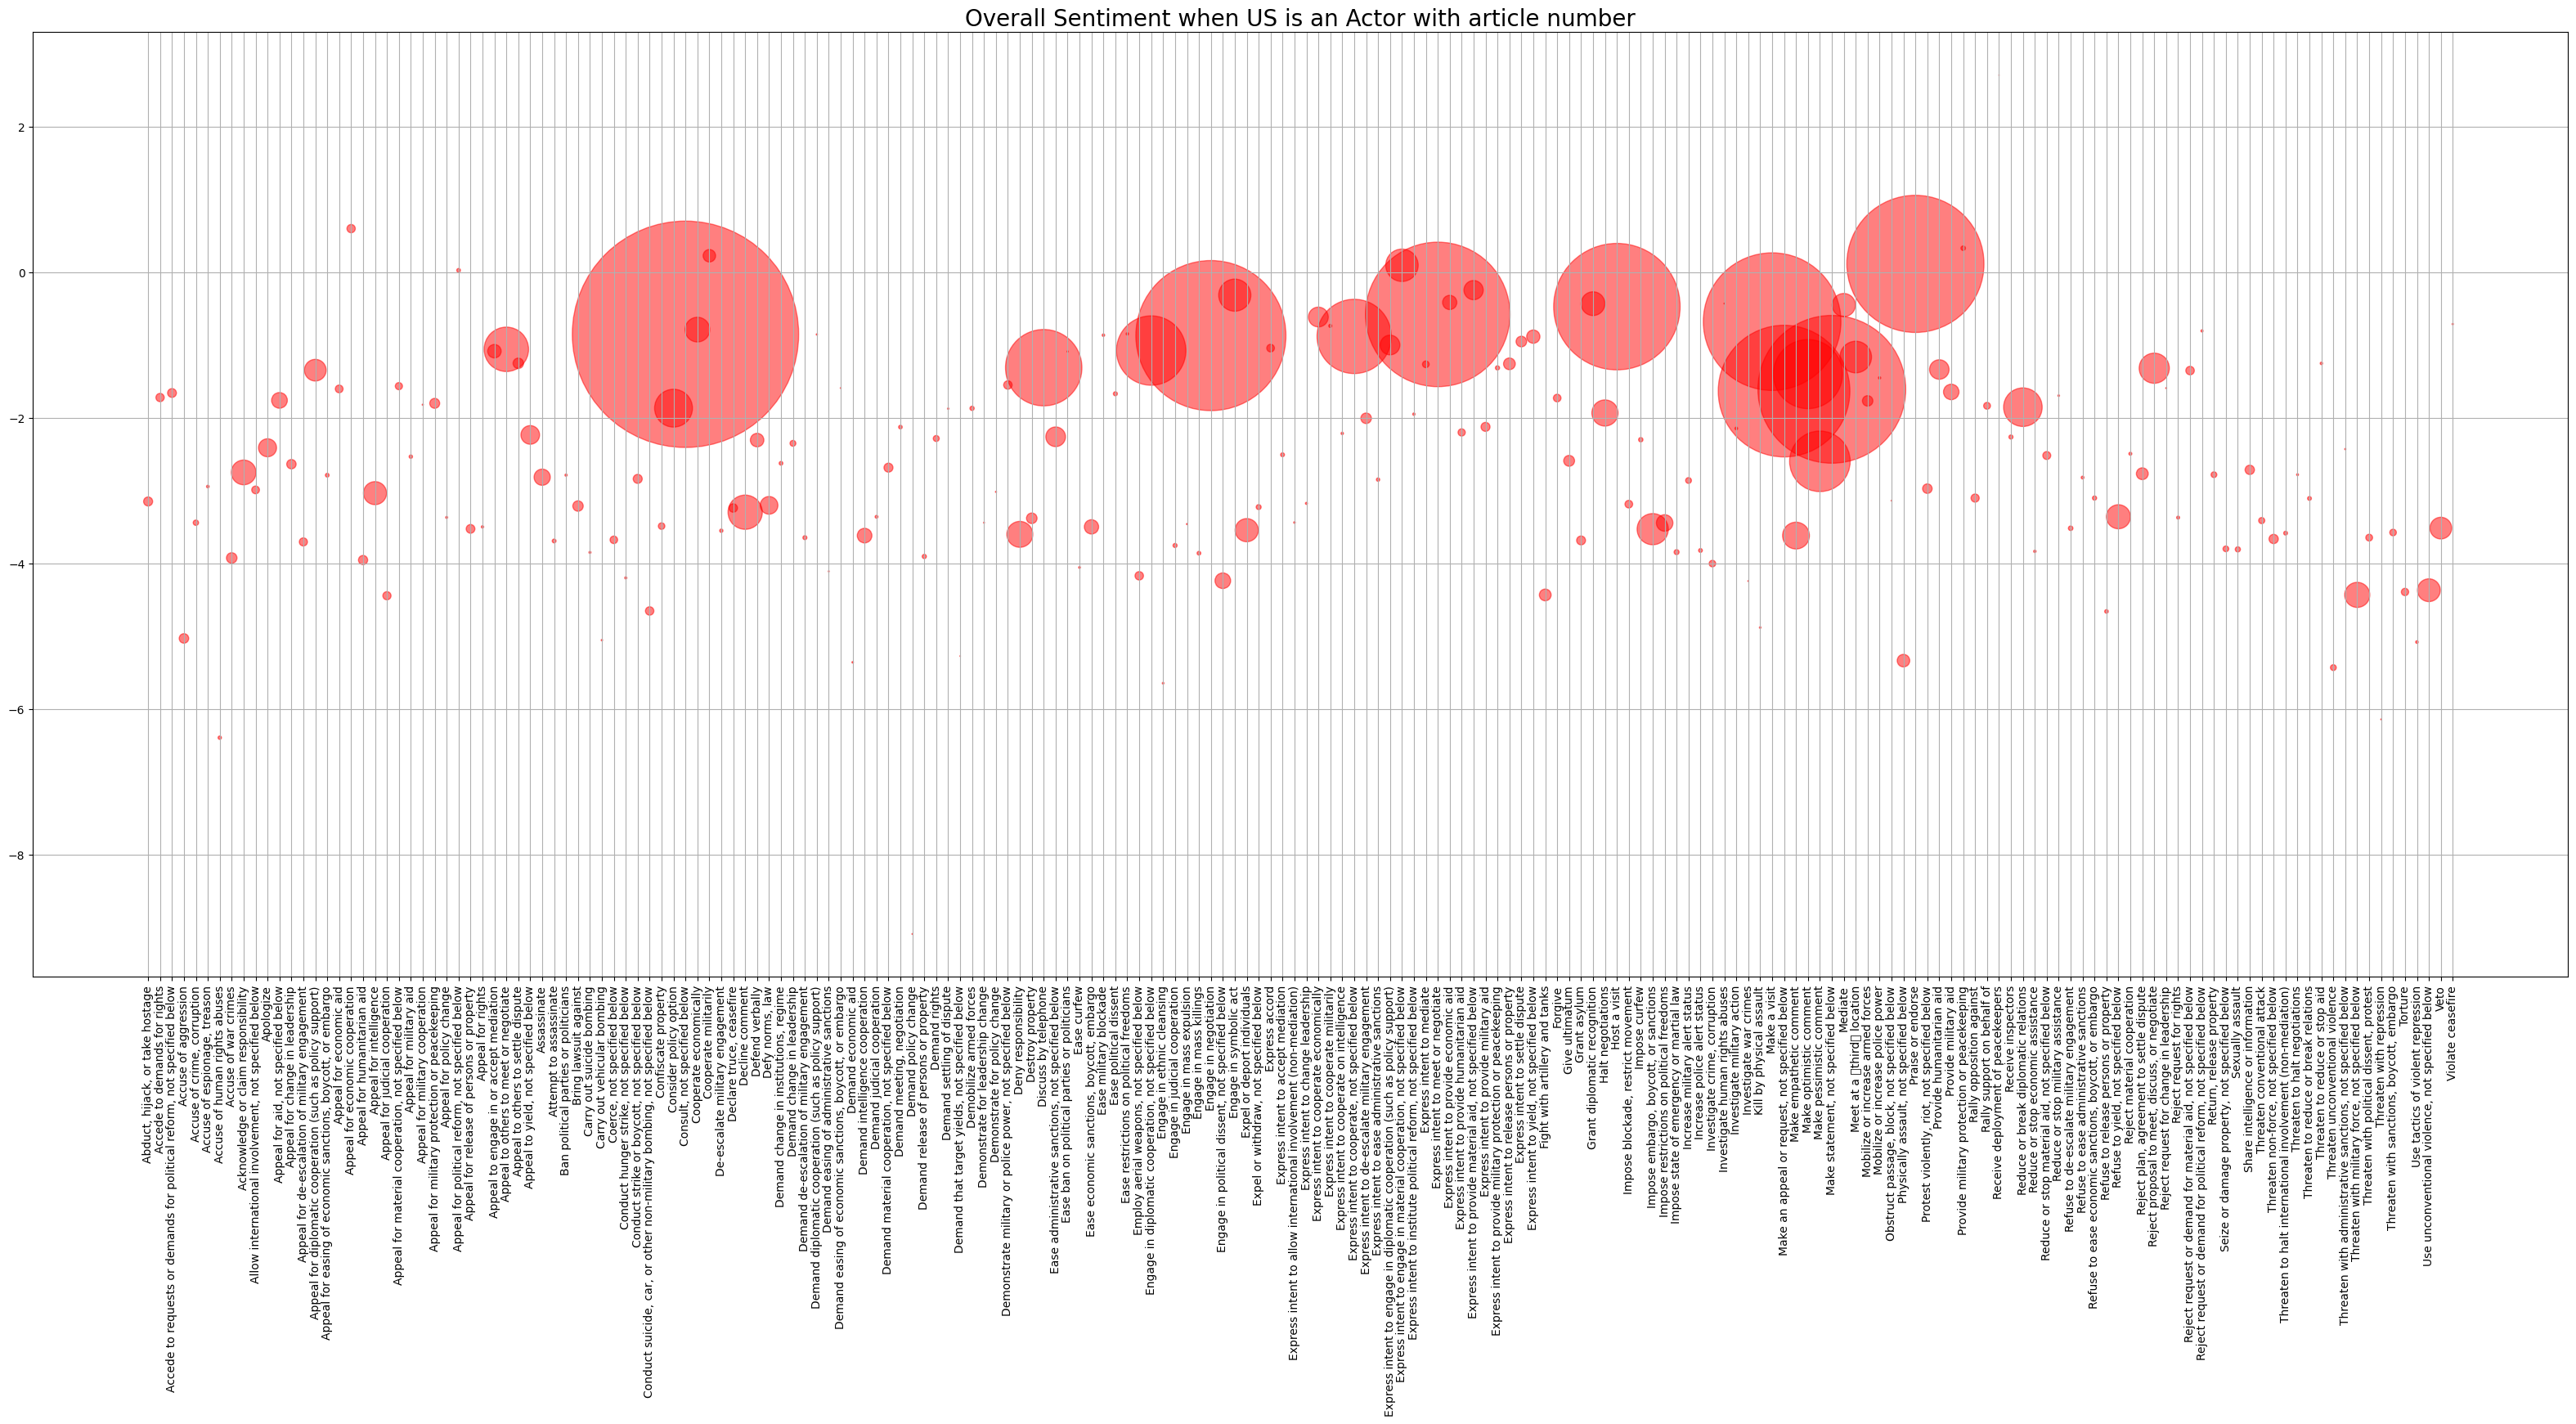

In [60]:
plt.figure(figsize = (40,15))
plt.scatter(action_overall_rec['Action Name'],action_overall_rec['AvgSentiment'], s = action_overall_rec['TotalArticleCount']*0.1, alpha=0.5, color = 'red')
plt.xticks(rotation='vertical')
plt.title('Overall Sentiment when US is an Actor with article number', fontsize = 20)
plt.grid()
plt.show()

### Overall Sentiments of Each Action when US is Recipient

In [80]:
overall_country_rec = df_2.groupby(['TargetCountryName']).agg(
    TotalArticleCount=('NumArticles', 'sum'),
    AvgSentiment=('AvgTone', 'mean'),
    AvgGoldsteinScale=('AvgGoldsteinScale','mean')
).reset_index()
overall_country_rec

TargetCountryName  TotalArticleCount  AvgSentiment  AvgGoldsteinScale
0                ARE               4114      0.832612           2.429096
1                AUS              30578     -1.009159           2.393302
2                AUT               2938     -1.088074           2.254721
3                BEL               8222     -0.940110           2.395529
4                BRA              13137     -1.328048           2.379094
5                CAN              50910     -0.533244           2.262369
6                CHE               8975     -1.261488           2.294662
7                CHL               5302     -0.785734           2.145072
8                CHN             126056     -1.560158           2.032216
9                COL              11656     -0.799312           2.381686
10               CZE               3627     -0.391826           2.375158
11               DEU              66435     -1.354452           2.290481
12               DNK               3152     -0.528271           2.012860
13               EGY              19459     -1.124029           2.325154
14               ESP              15739     -0.647279           2.264640
15               FIN               5958     -1.105212           2.719355
16               FRA              47360     -1.046593           2.241272
17               GBR             124766     -0.906448           2.143097
18               GRC              17256     -0.134188           2.136002
19               HKG               1699     -2.326350           1.787868
20               HUN               5433     -0.398286           2.109471
21               IDN              10010     -0.247784           2.067134
22               IND              50040      0.075078           2.373629
23               IRL              14802      0.095183           2.256825
24               ISR             124637     -1.590792           2.049433
25               ITA              16021     -0.737681           2.356105
26               JPN              50419     -0.675844           2.531453
27               KOR              29048     -0.844287           2.529686
28               KWT               1894      0.522648           2.446124
29               MEX              65800     -1.273745           2.200830
30               MYS               2711     -1.086698           1.971659
31               NLD               4896     -0.646375           2.419338
32               NOR               5982     -0.018168           2.335578
33               NZL               7330     -0.505428           2.336480
34               PER               6655     -0.648587           2.501958
35               PHL              19275     -1.010610           2.028989
36               POL              13611     -0.726944           2.392276
37               PRT               1795      0.470836           2.357143
38               QAT               5090     -0.700947           2.372951
39               SAU              35544     -1.287128           1.998963
40               SGP               7553     -0.130674           2.355972
41               SWE               6623     -0.723912           2.416482
42               THA               2895     -0.781492           2.484798
43               TUR              39250     -2.337005           1.878421
44               TWN               6573     -0.388100           2.489872
45               ZAF               5432     -0.859382           2.108538

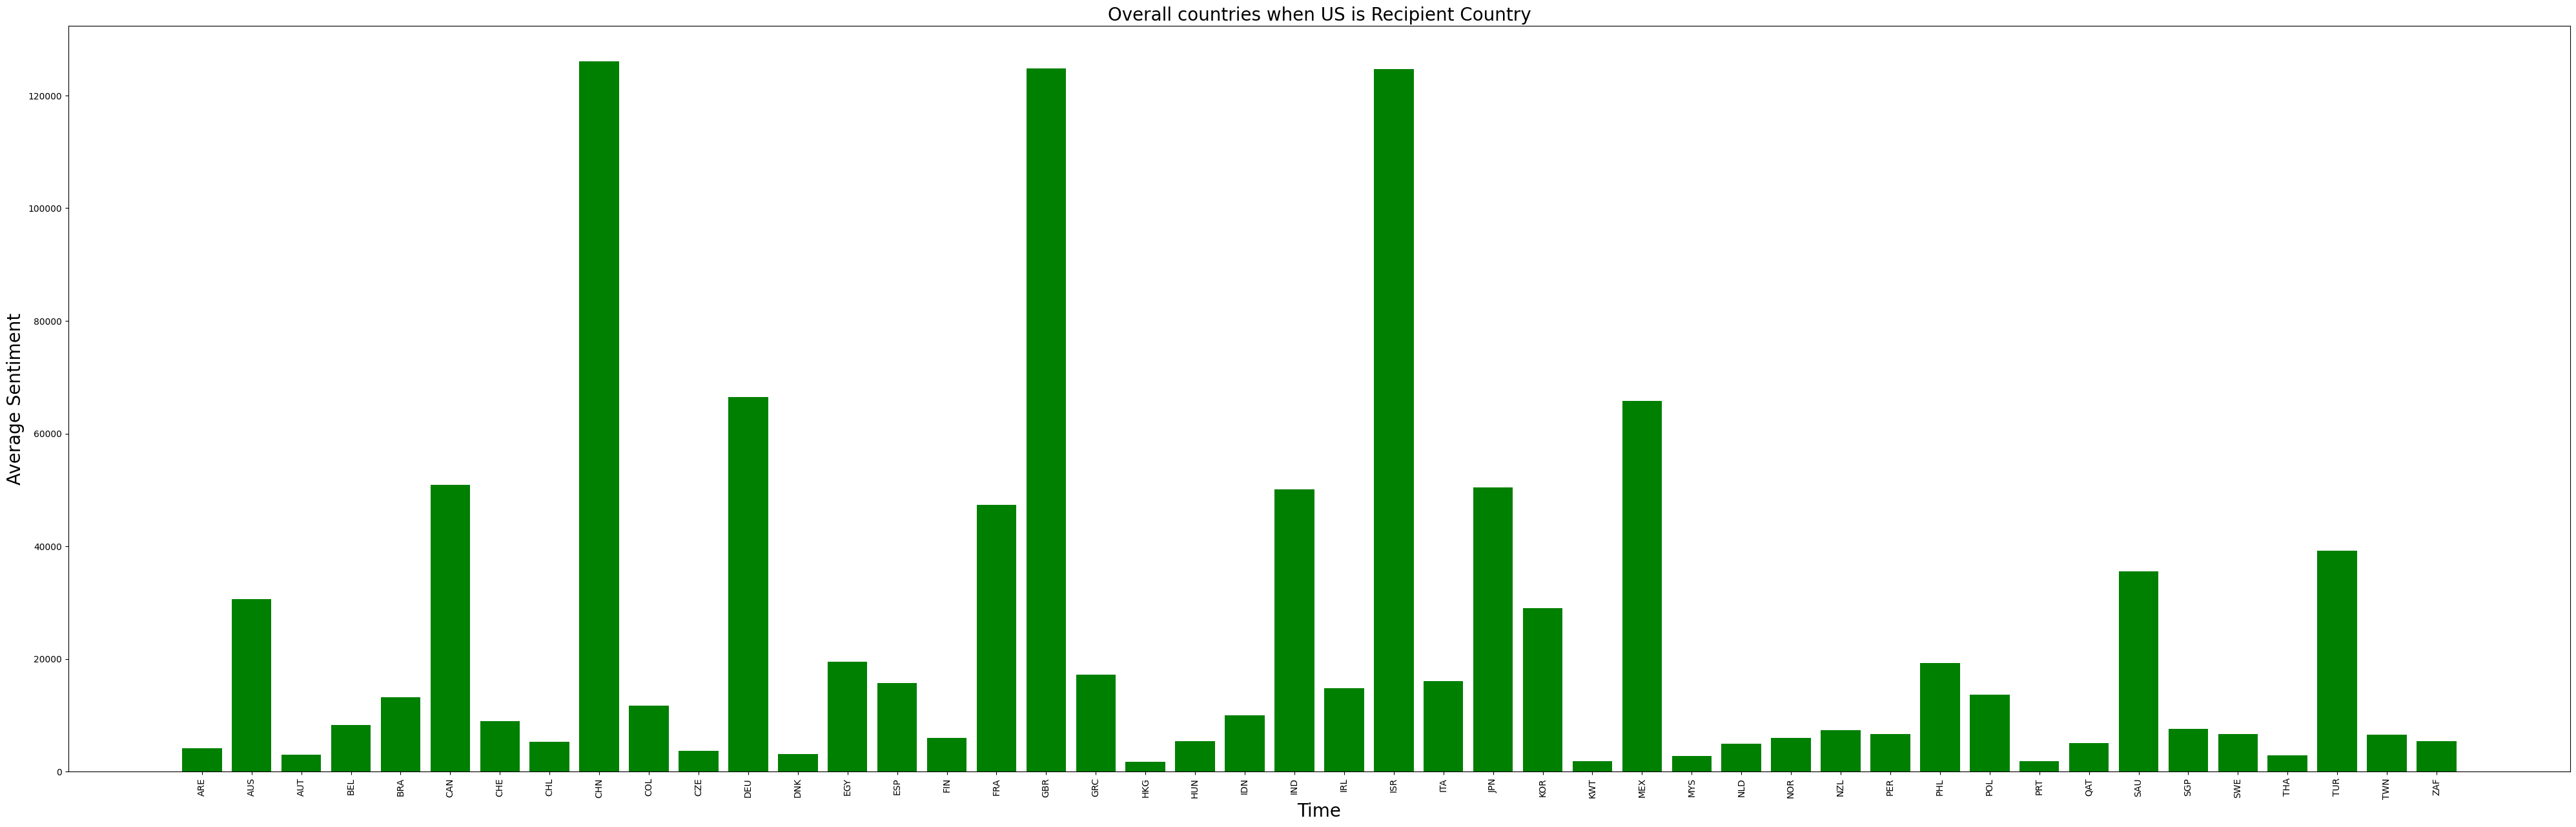

In [81]:
plt.figure(figsize = (50,15))
plt.bar(overall_country_rec['TargetCountryName'],overall_country_rec['TotalArticleCount'],color = 'green')
plt.xticks(rotation='vertical')
plt.title('Overall countries when US is Recipient Country', fontsize = 20)
plt.xlabel('Time',fontsize = 20)
plt.ylabel('Total Article Count',fontsize = 20)
plt.show()

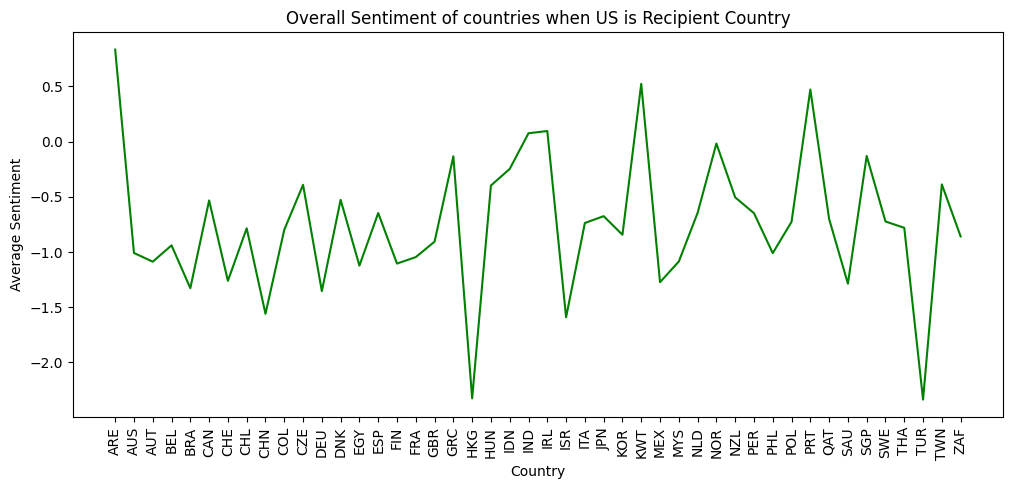

In [82]:
plt.figure(figsize = (12,5))
plt.plot(overall_country_rec['TargetCountryName'],overall_country_rec['AvgSentiment'],color = 'green')
plt.xticks(rotation='vertical')
plt.title('Overall Sentiment of countries when US is Recipient Country')
plt.xlabel('Country')
plt.ylabel('Average Sentiment')
plt.show()